In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
reservations = pd.read_csv('./data/reservations.csv')
reservations.head()

,year,month,status,status_date,number,day_of_month,reservation_days_advance,room_type,weekend_nights,week_nights,...,entreprise,waiting_list,segment,average_rate,num_vehicles,num_cancellations,num_bookings_not_canceled,special_requests,total_length_of_stay,total_spending
0,2015,August,Canceled,2014-10-17,33,13,300,A,0,2,...,NaN,0,Transient-Party,62.8,0,1,0,0,0,0
1,2015,July,Canceled,2014-10-17,28,9,265,A,0,2,...,NaN,0,Transient-Party,62.8,0,1,0,0,0,0
2,2015,July,Canceled,2014-10-17,28,9,265,A,0,2,...,NaN,0,Transient-Party,62.8,0,1,0,0,0,0
3,2015,July,Canceled,2014-10-17,28,9,265,A,0,2,...,NaN,0,Transient-Party,62.8,0,1,0,0,0,0
4,2015,July,Canceled,2014-10-17,28,9,265,A,0,2,...,NaN,0,Transient-Party,62.8,0,1,0,0,0,0


In [3]:
reservations.shape
#79390 rows, 31 columns

(79390, 31)

In [4]:
reservations.dtypes

year                           int64
month                         object
status                        object
status_date                   object
number                         int64
day_of_month                   int64
reservation_days_advance       int64
room_type                     object
weekend_nights                 int64
week_nights                    int64
num_adults                     int64
num_children                 float64
num_babies                     int64
meal                          object
name_hotel                    object
CRM                           object
returning                      int64
room_assigned                 object
reservation_changes            int64
deposit                       object
operator                     float64
entreprise                   float64
waiting_list                   int64
segment                       object
average_rate                 float64
num_vehicles                   int64
num_cancellations              int64
n

In [5]:
reservations.describe()

,year,number,day_of_month,reservation_days_advance,weekend_nights,week_nights,num_adults,num_children,num_babies,returning,...,operator,entreprise,waiting_list,average_rate,num_vehicles,num_cancellations,num_bookings_not_canceled,special_requests,total_length_of_stay,total_spending
count,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79386.000000,79390.000000,79390.000000,...,68780.000000,4346.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000,79390.000000
mean,2015.761784,30.334538,15.750661,107.863371,0.906852,2.464227,1.849225,0.092094,0.008351,0.028190,...,81.438587,161.209158,3.378070,95.537943,0.062917,0.124197,0.107671,0.501826,2.026817,231.245018
std,0.509083,13.272608,8.786656,111.159098,0.997056,1.885558,0.613342,0.377013,0.102708,0.165516,...,104.901383,112.172729,21.264941,47.812391,0.243748,1.023803,1.242978,0.750646,2.572277,308.535028
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,20.000000,8.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,9.000000,46.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,33.000000,16.000000,70.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,13.000000,153.000000,0.000000,89.550000,0.000000,0.000000,0.000000,0.000000,1.000000,126.000000
75%,2016.000000,41.000000,23.000000,168.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,187.000000,223.000000,0.000000,117.797500,0.000000,0.000000,0.000000,1.000000,3.000000,365.000000
max,2017.000000,53.000000,31.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,481.000000,487.000000,391.000000,5400.000000,3.000000,26.000000,54.000000,5.000000,69.000000,7592.000000


In [6]:
reservations.describe(include='object') #object types

,month,status,status_date,room_type,meal,name_hotel,CRM,room_assigned,deposit,segment
count,79390,79390,79390,79390,79390,79390,79390,79390,79390,79390
unique,12,3,647,10,5,2,8,12,3,4
top,October,Check-Out,2015-10-21,A,BB,City Hotel,Online TA,A,No Deposit,Transient
freq,11160,48079,1461,59215,62515,52806,34072,50269,67456,56865


In [7]:
for object in reservations.describe(include='object'):
    print(reservations[object].value_counts())

#two different hotels: City Hotel and Resort Hotel


month
October      11160
September    10508
August        9039
July          7648
November      6782
May           6135
April         5945
June          5595
March         5118
December      4395
February      4165
January       2900
Name: count, dtype: int64
status
Check-Out    48079
Canceled     30474
No-Show        837
Name: count, dtype: int64
status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-24       1
2015-02-26       1
2015-02-27       1
2015-03-05       1
2015-03-10       1
Name: count, Length: 647, dtype: int64
room_type
A    59215
D    11574
E     3784
F     1759
G     1264
B      942
C      447
H      393
L        6
P        6
Name: count, dtype: int64
meal
BB           62515
HB           10018
SC            5518
FB             698
Undefined      641
Name: count, dtype: int64
name_hotel
City Hotel      52806
Resort Hotel    26584
Name: count, dtype: int64
CRM
Online TA        34072
Offline TA

In [8]:
reservations.isna().sum()

year                             0
month                            0
status                           0
status_date                      0
number                           0
day_of_month                     0
reservation_days_advance         0
room_type                        0
weekend_nights                   0
week_nights                      0
num_adults                       0
num_children                     4
num_babies                       0
meal                             0
name_hotel                       0
CRM                              0
returning                        0
room_assigned                    0
reservation_changes              0
deposit                          0
operator                     10610
entreprise                   75044
waiting_list                     0
segment                          0
average_rate                     0
num_vehicles                     0
num_cancellations                0
num_bookings_not_canceled        0
special_requests    

In [9]:
reservations.drop(['entreprise', 'operator'], axis=1, inplace=True)

In [10]:
city_hotel = reservations[reservations['name_hotel']=='City Hotel']
resort_hotel = reservations[reservations['name_hotel']=='Resort Hotel']

In [11]:
#Ideas for things to do 

#num of week and weekend nights distributions, general and across hotels. 
#correlations of variables. what features are linked to cancelling/not_cancelling? how do these features differ across hotels?
#customer segments across hotels and overall

#deal with outliers, like in the previous assignment?

#can any of the correlated variables start to show separability?


# Is data unbalanced? Visualization. Is it the same or similar across both hotels.
# Reservations by month histogram. Cancelled vs. not-cancelled. What months have the highest cancellations? Why?

# Average Rate Time Series. Capture Seasonal patterns, do cancellations increase when average rates increase? 
#How do these rates differ between hotels? Average-rate per month.

# Arrival-Date Based Features. Are most of the cancels from bookings bought early in the year? 

# For numerical transformations: Simple Imputer(strat=median), StandardScaler.
# For categorical transformations: Simple Imputer(strat='most_frequent'), LabelEncoder/OrdinalEncoder

# For the models, start with a RandomTreeClassifier and LogisticRegression. Then see how using a RandomForestClassifier improves the accuracy.
# Use StratifiedKFold, Bagging, etc. K-Means algorithm? Explore hyperparameter space using GridSearch, like in class. 
# do we want to use PCA before using the model?



In [12]:
def analyze_hotel_distributions(df):
    """
    Analyze distributions of variables across hotels to determine if separate analysis for each hotel is needed.
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove('name_hotel')
    
    results = {
        'numerical_tests': {},
        'categorical_tests': {}
    }
    
    # Analyze numerical variables
    for col in numerical_cols:
        # Get data for each hotel
        city_data = df[df['name_hotel'] == 'City Hotel'][col].dropna()
        resort_data = df[df['name_hotel'] == 'Resort Hotel'][col].dropna()
        
        statistic, pvalue = stats.mannwhitneyu(
            city_data, 
            resort_data,
            alternative='two-sided'
        )
        
        # Effect size, we relate the mean differences between the data with the variability for both
        pooled_std = np.sqrt((city_data.var() + resort_data.var()) / 2)
        effect_size = abs(city_data.mean() - resort_data.mean()) / pooled_std
        
        # some basic statistics
        stats_summary = {
            'city_mean': city_data.mean(),
            'resort_mean': resort_data.mean(),
            'city_median': city_data.median(),
            'resort_median': resort_data.median(),
            'city_std': city_data.std(),
            'resort_std': resort_data.std()
        }
        
        results['numerical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': effect_size,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': effect_size > 0.2,  # Common threshold for small effect
            'statistics': stats_summary
        }
    
    # for categorical
    for col in categorical_cols:
        # creates contingency table for an independence test
        contingency = pd.crosstab(df['name_hotel'], df[col])
        
        # as we learned in stats class, we used chi-square tests of independence
        chi2, pvalue, _, _ = stats.chi2_contingency(contingency)
        
        # how strong is the relationship? (sqrt(chi-squared/(n(k-1))
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        # Distribution analysis
        props = pd.crosstab(df['name_hotel'], df[col], normalize='index')
        max_diff = (props.loc['City Hotel'] - props.loc['Resort Hotel']).abs().max()
        
        results['categorical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': strength,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': strength > 0.1,  # Common threshold for Cramer's V
            'max_category_difference': max_diff,
            'distribution': props.to_dict()
        }
    
    # to create a summary DataFrame
    summary_data = []
    
    for var_type, tests in results.items():
        for variable, metrics in tests.items():
            summary_data.append({
                'Variable': variable,
                'Type': 'Numerical' if var_type == 'numerical_tests' else 'Categorical',
                'p_value': metrics['p_value'],
                'effect_size': metrics['effect_size'],
                'Significant': metrics['significant_difference'],
                'Meaningful': metrics['meaningful_difference']
            })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(
        ['Meaningful', 'Significant', 'effect_size'],
        ascending=[False, False, False]
    )
    
    return summary_df, results

In [13]:
def print_detailed_analysis(results, threshold_effect_size = 0.2):
    """
    Prints detailed analysis of differences between hotels.
    threshold_effect_size (float): Threshold for considering effect size meaningful. We just used the most commonly used.
    """
    print("\nVariables requiring separate analysis by hotel:")
    print("=============================================")
    
    # Analyze numerical variables
    significant_num = []
    for var, metrics in results['numerical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_num.append((var, metrics['effect_size']))
    
    if significant_num:
        print("\nNumerical variables:")
        for var, effect in sorted(significant_num, key=lambda x: x[1], reverse=True):
            stats = results['numerical_tests'][var]['statistics']
            print(f"\n{var} (effect size: {effect:.3f}):")
            print(f"  City Hotel: mean={stats['city_mean']:.2f}, median={stats['city_median']:.2f}")
            print(f"  Resort Hotel: mean={stats['resort_mean']:.2f}, median={stats['resort_median']:.2f}")
    
    # Analyze categorical variables
    significant_cat = []
    for var, metrics in results['categorical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_cat.append((var, metrics['effect_size']))
    
    if significant_cat:
        print("\nCategorical variables:")
        for var, effect in sorted(significant_cat, key=lambda x: x[1], reverse=True):
            print(f"\n{var} (Effect strength (Cramer's V): {effect:.3f}):")
            props = pd.DataFrame(results['categorical_tests'][var]['distribution'])
            print(props.round(3))
    
    if not significant_num and not significant_cat:
        print("\nNo variables show meaningful differences between hotels!")

In [14]:
# Run the analysis
summary, results = analyze_hotel_distributions(reservations)


# View summary of all variables
print("\nSummary of all variables:")
summary


Summary of all variables:


,Variable,Type,p_value,effect_size,Significant,Meaningful
17,total_length_of_stay,Numerical,0.000000e+00,0.495754,True,True
5,week_nights,Numerical,0.000000e+00,0.492566,True,True
18,total_spending,Numerical,0.000000e+00,0.488014,True,True
13,num_vehicles,Numerical,0.000000e+00,0.415284,True,True
4,weekend_nights,Numerical,0.000000e+00,0.411388,True,True
25,room_assigned,Categorical,0.000000e+00,0.401197,True,True
22,room_type,Categorical,0.000000e+00,0.336813,True,True
21,status_date,Categorical,0.000000e+00,0.336602,True,True
23,meal,Categorical,0.000000e+00,0.289291,True,True
11,waiting_list,Numerical,1.321937e-287,0.218972,True,True


In [15]:
print_detailed_analysis(results)


Variables requiring separate analysis by hotel:

Numerical variables:

total_length_of_stay (effect size: 0.496):
  City Hotel: mean=1.57, median=1.00
  Resort Hotel: mean=2.93, median=2.00

week_nights (effect size: 0.493):
  City Hotel: mean=2.14, median=2.00
  Resort Hotel: mean=3.12, median=3.00

total_spending (effect size: 0.488):
  City Hotel: mean=177.25, median=104.00
  Resort Hotel: mean=338.49, median=193.00

num_vehicles (effect size: 0.415):
  City Hotel: mean=0.03, median=0.00
  Resort Hotel: mean=0.14, median=0.00

weekend_nights (effect size: 0.411):
  City Hotel: mean=0.77, median=1.00
  Resort Hotel: mean=1.19, median=1.00

waiting_list (effect size: 0.219):
  City Hotel: mean=4.76, median=0.00
  Resort Hotel: mean=0.64, median=0.00

average_rate (effect size: 0.203):
  City Hotel: mean=98.92, median=95.00
  Resort Hotel: mean=88.81, median=72.00

Categorical variables:

room_assigned (Effect strength (Cramer's V): 0.401):
                  A      B      C      D    

In [16]:
def plot_distributions(df, results, show_all = False):
    """
    create visualizations for variable distributions across hotels. 
    if show_all is set to True, all variables are plotted, does not matter if they have significant differences across hotels.
    if show_all is set to False (default), only variables with meaningful differences are plotted
    """
    def create_numerical_plot(data, var, has_difference):
        """Helper function to create numerical variable plots"""
        plt.figure(figsize=(12, 6))
        
        # Left subplot: Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, x='name_hotel', y=var)
        plt.title(f'Distribution of {var} by Hotel Type\n{"(Significant Difference)" if has_difference else "(No Significant Difference)"}')
        
        # Right subplot: KDE plot
        plt.subplot(1, 2, 2)
        for hotel in ['City Hotel', 'Resort Hotel']:
            sns.kdeplot(data=data[data['name_hotel'] == hotel][var], label=hotel)
        plt.title(f'Density Distribution of {var}')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    def create_categorical_plot(data, var, has_difference):
        """Helper function to create categorical variable plots"""
        # Calculate proportions
        props = pd.crosstab(data['name_hotel'], data[var], normalize='index')
        plt.figure(figsize=(12, 6))
        #comparison bar plot
        props.T.plot(kind='bar')
        plt.title(f'Category Distribution Comparison')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    # Plot numerical variables
    print("\n=== Numerical Variables ===")
    for var, metrics in results['numerical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Effect size: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_numerical_plot(df, var, has_difference)

    # Plot categorical variables
    print("\n=== Categorical Variables ===")
    for var, metrics in results['categorical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Cramer's V: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_categorical_plot(df, var, has_difference)



=== Numerical Variables ===

Plotting year (Effect size: 0.143)


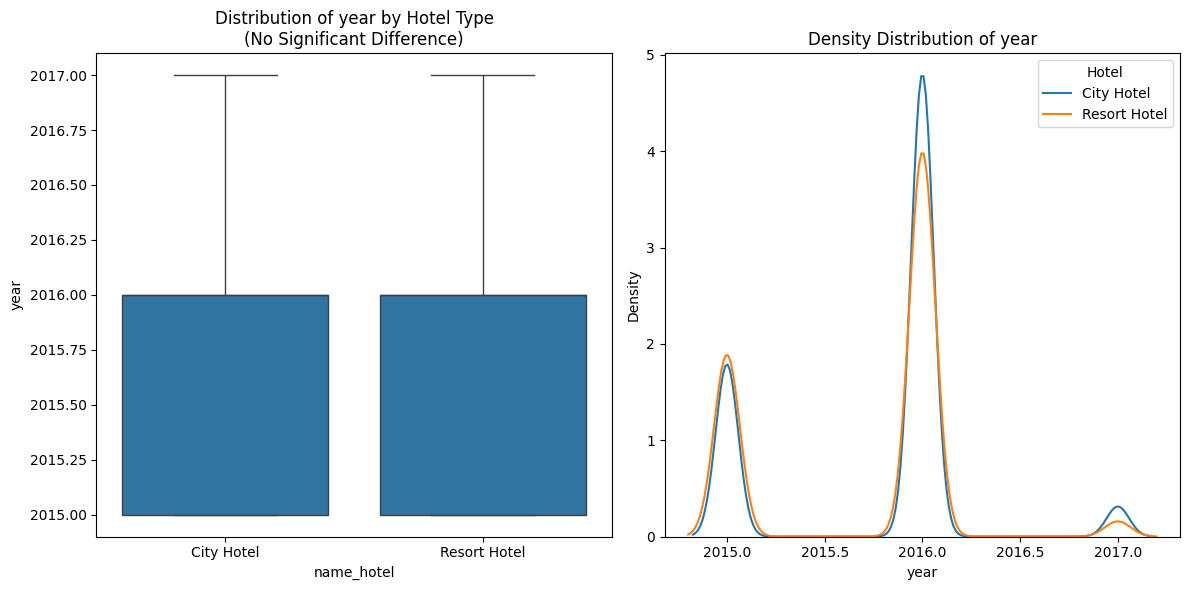


Plotting number (Effect size: 0.007)


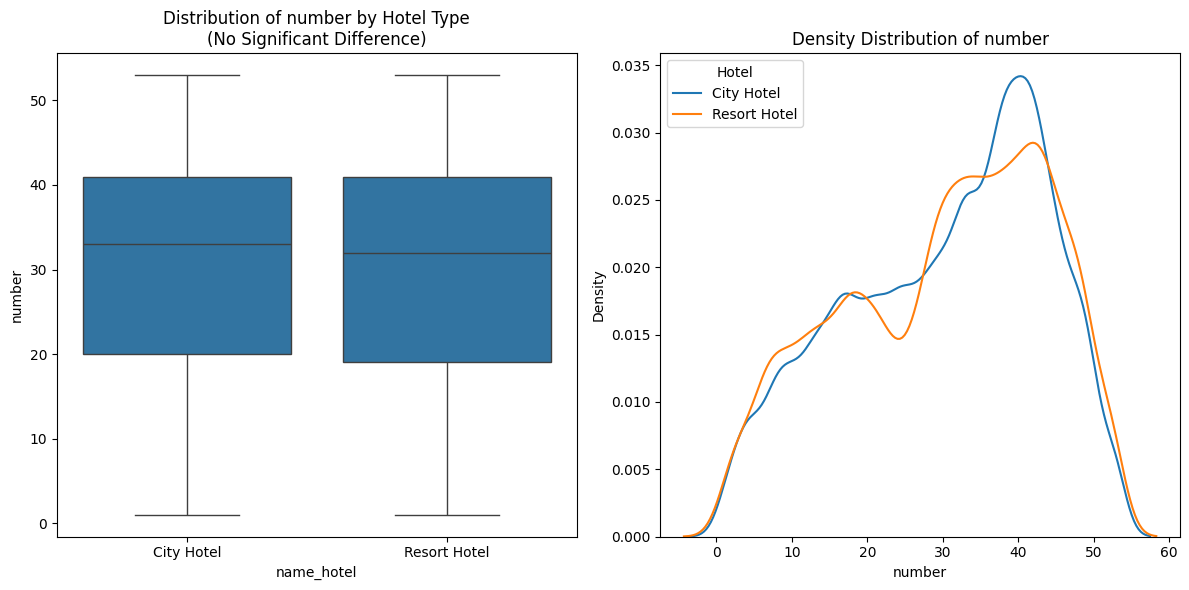


Plotting day_of_month (Effect size: 0.006)


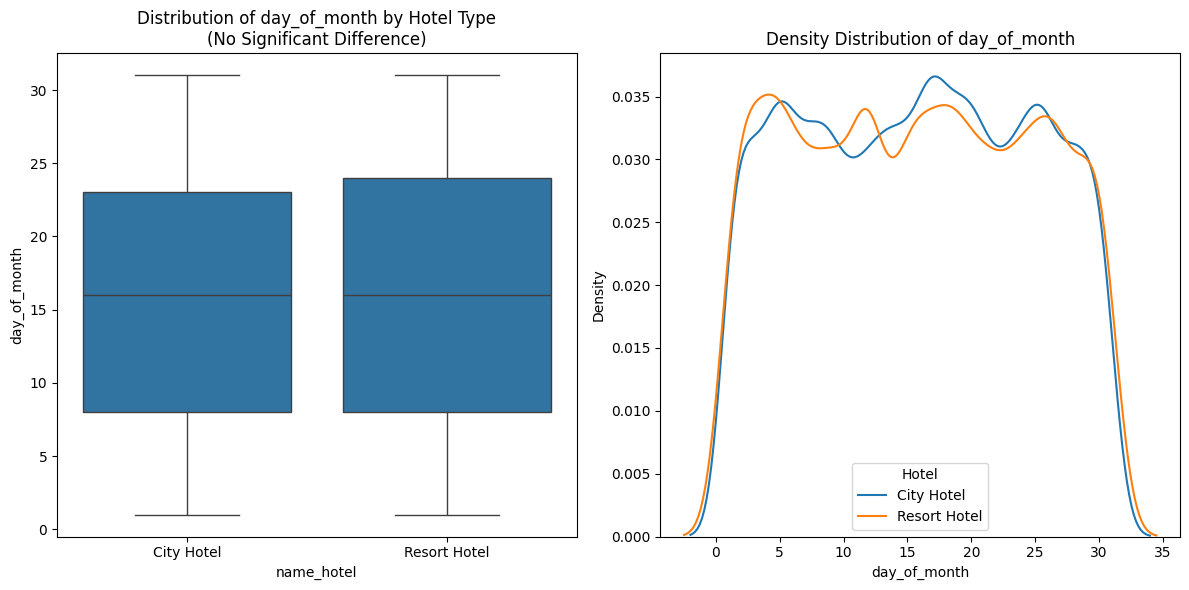


Plotting reservation_days_advance (Effect size: 0.178)


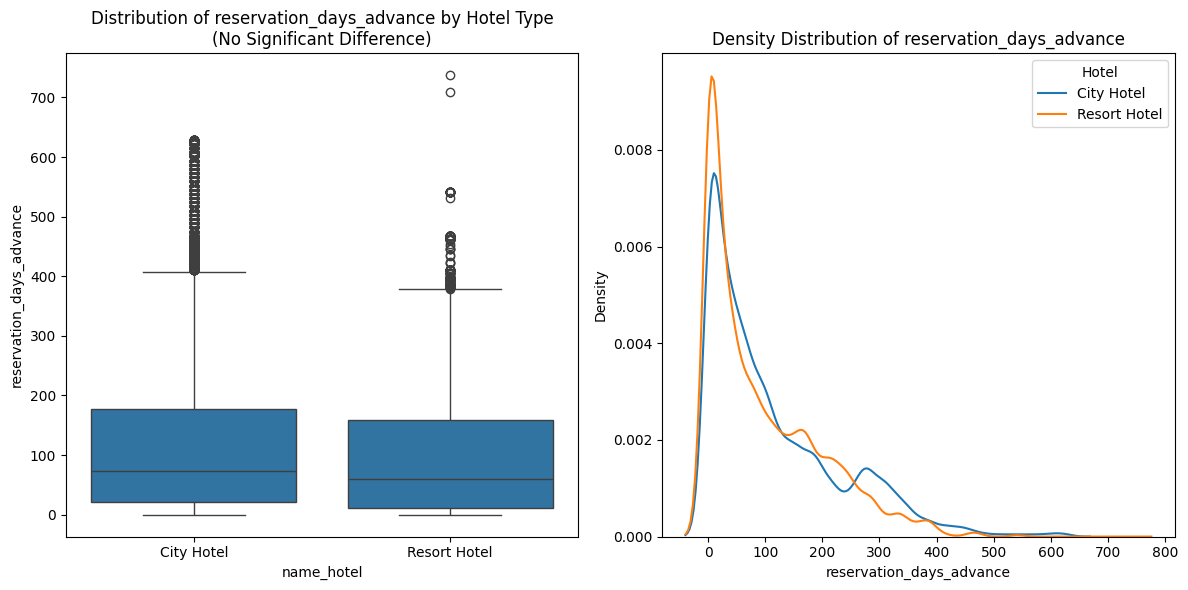


Plotting weekend_nights (Effect size: 0.411)


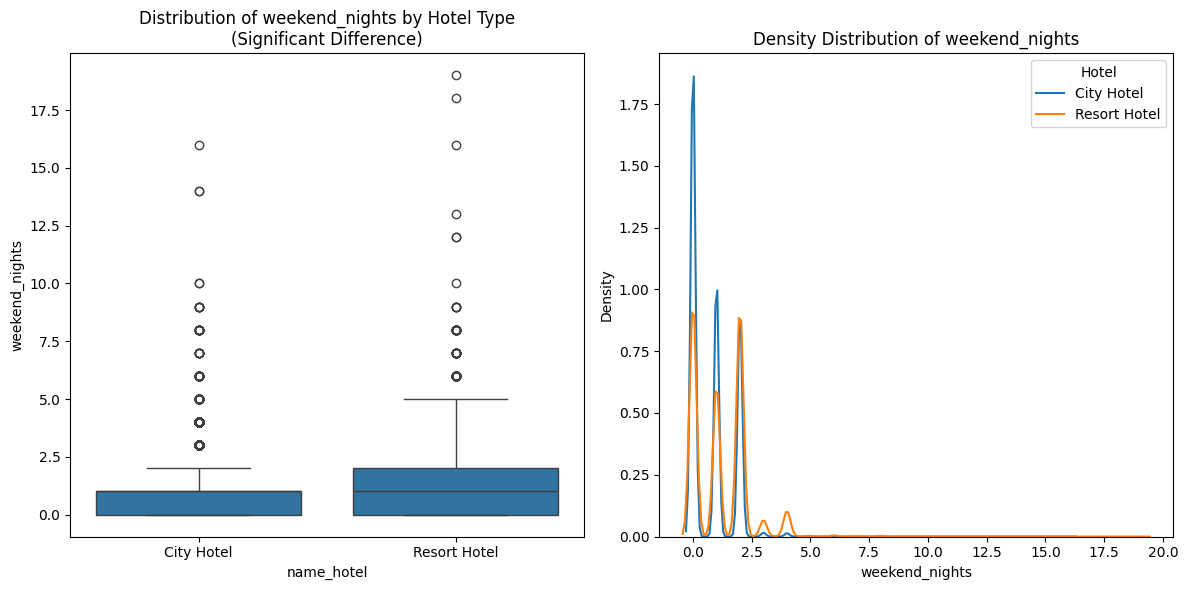


Plotting week_nights (Effect size: 0.493)


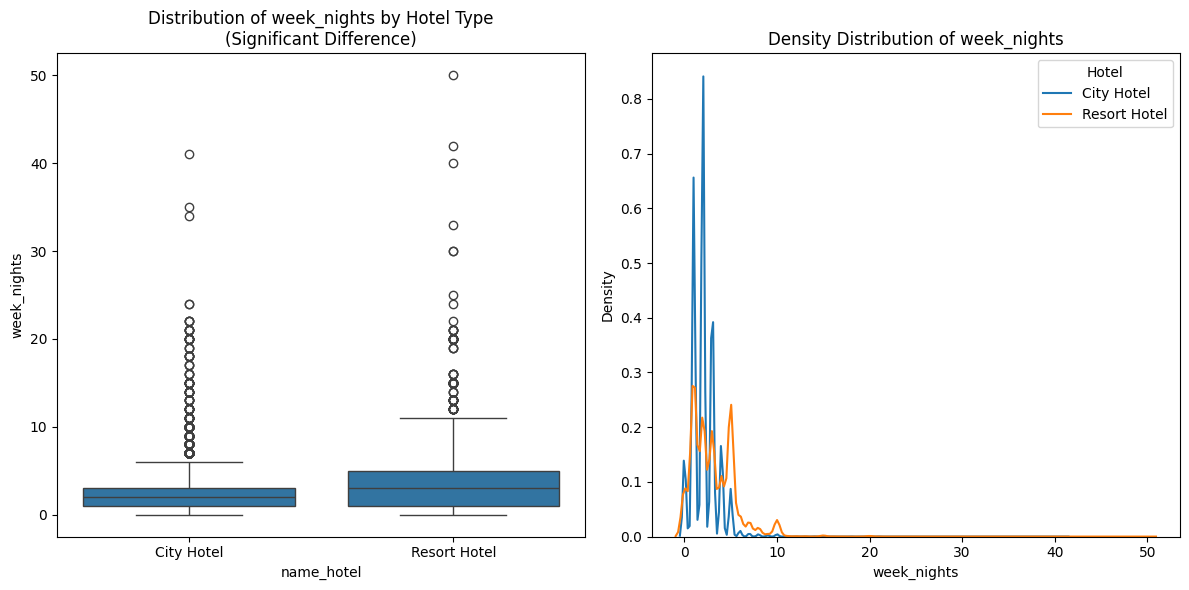


Plotting num_adults (Effect size: 0.063)


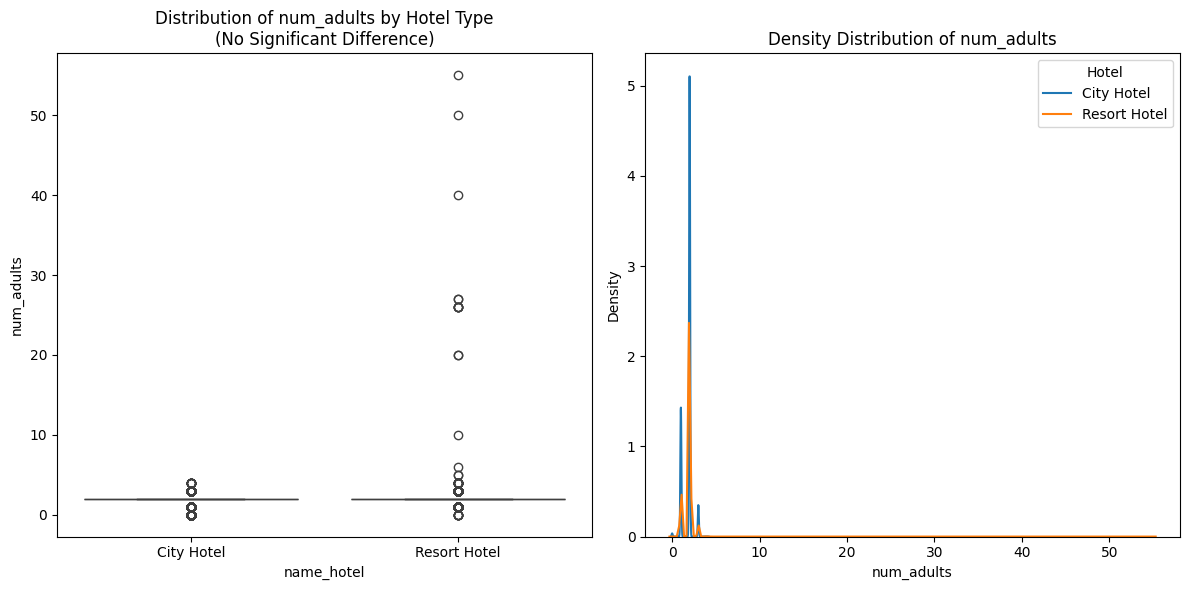


Plotting num_children (Effect size: 0.078)


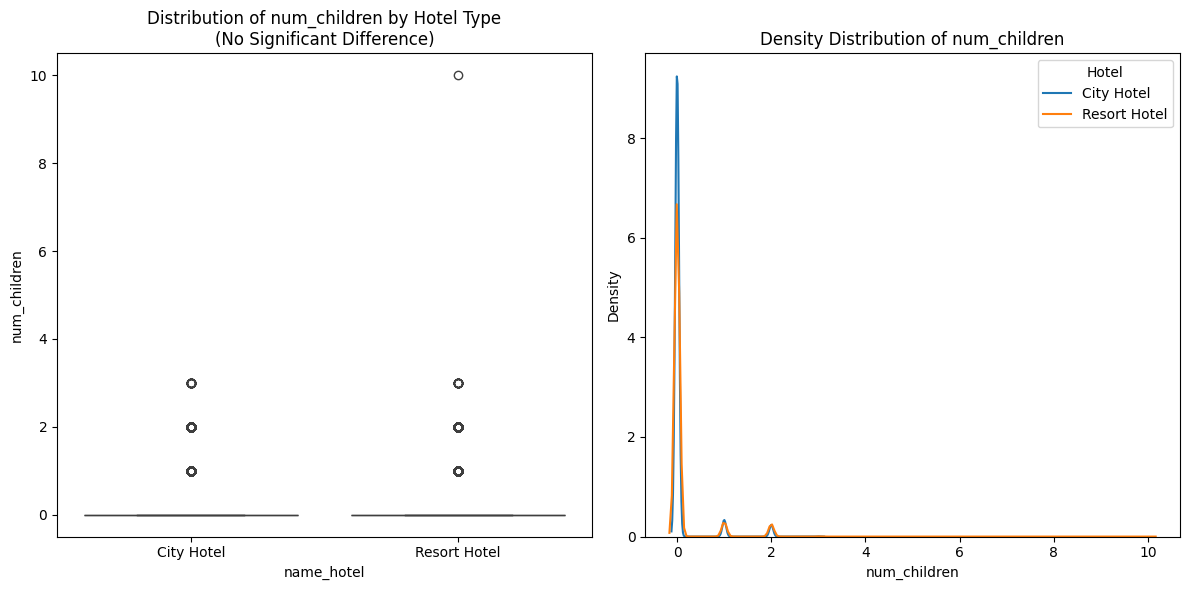


Plotting num_babies (Effect size: 0.090)


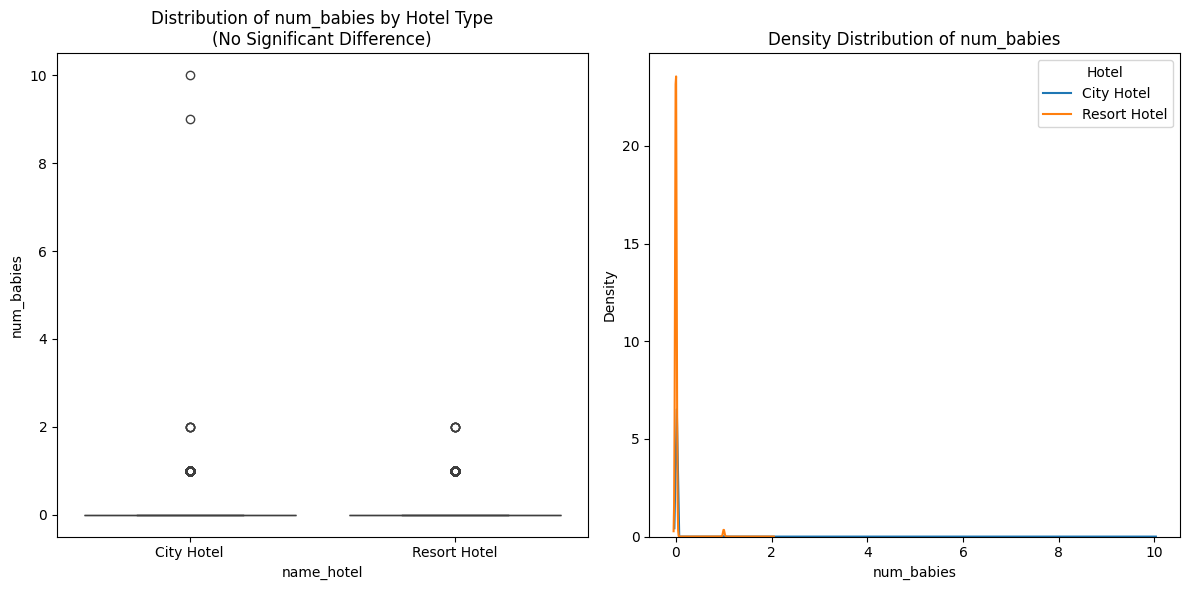


Plotting returning (Effect size: 0.050)


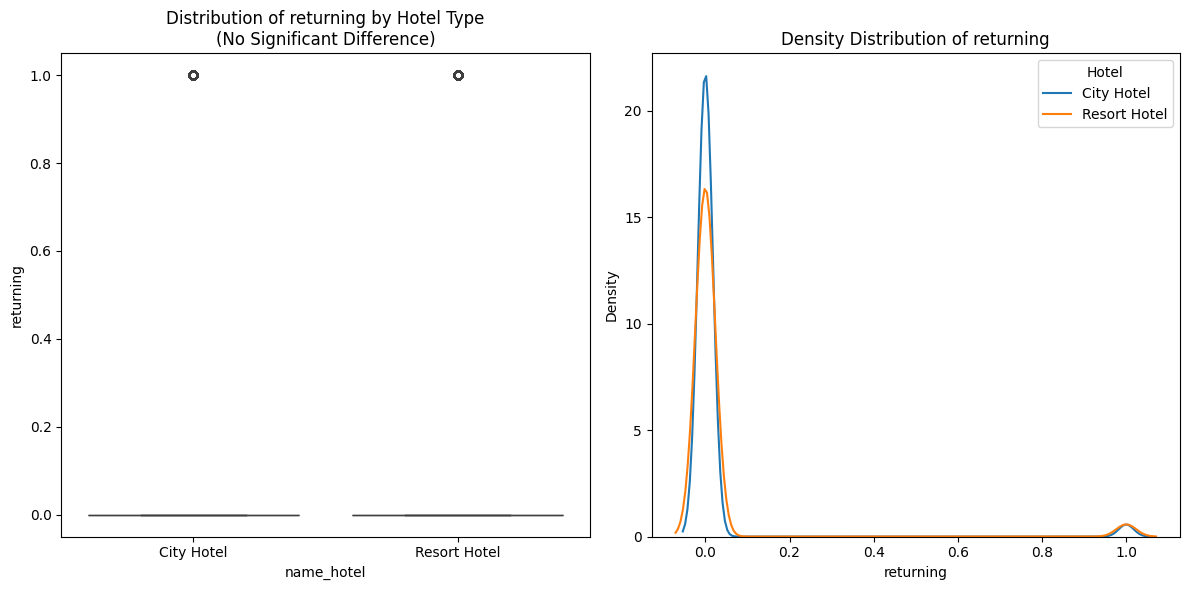


Plotting reservation_changes (Effect size: 0.157)


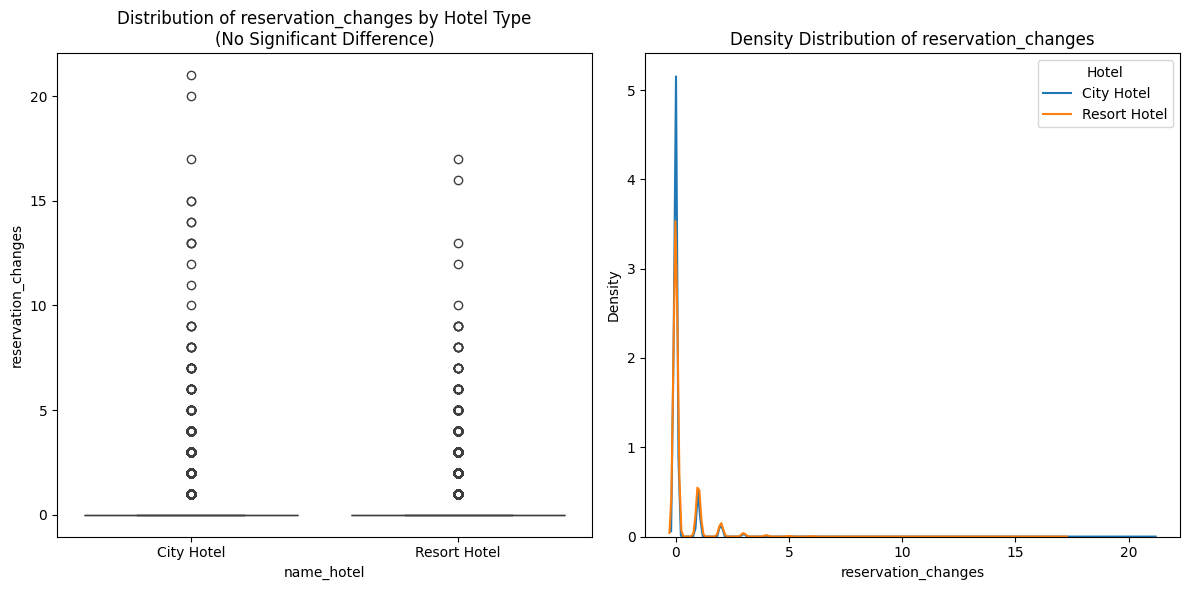


Plotting waiting_list (Effect size: 0.219)


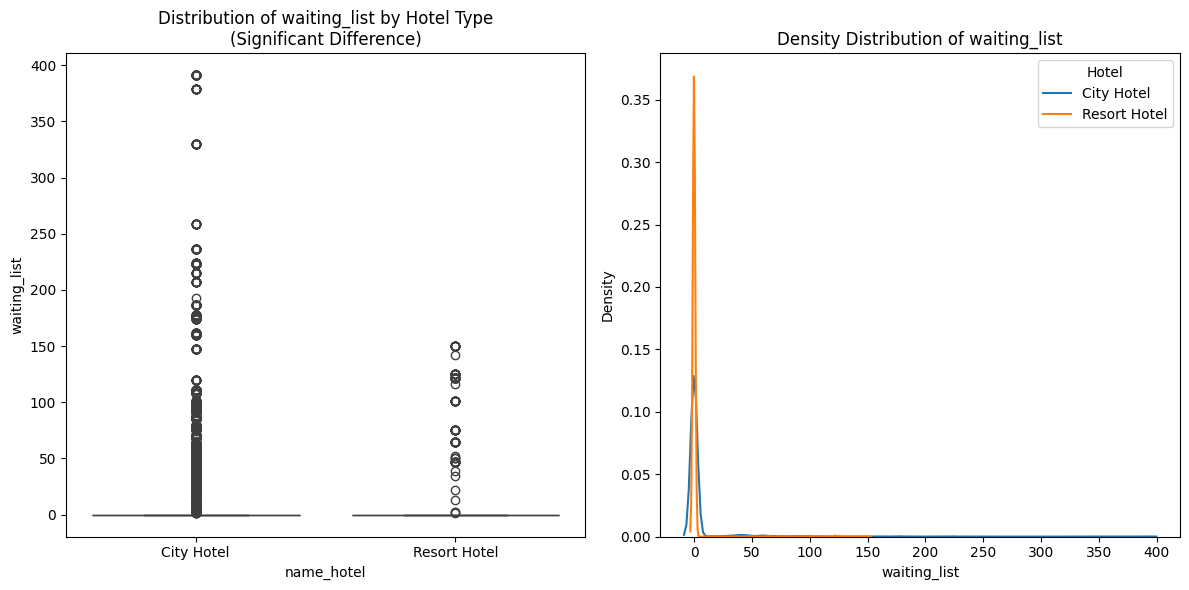


Plotting average_rate (Effect size: 0.203)


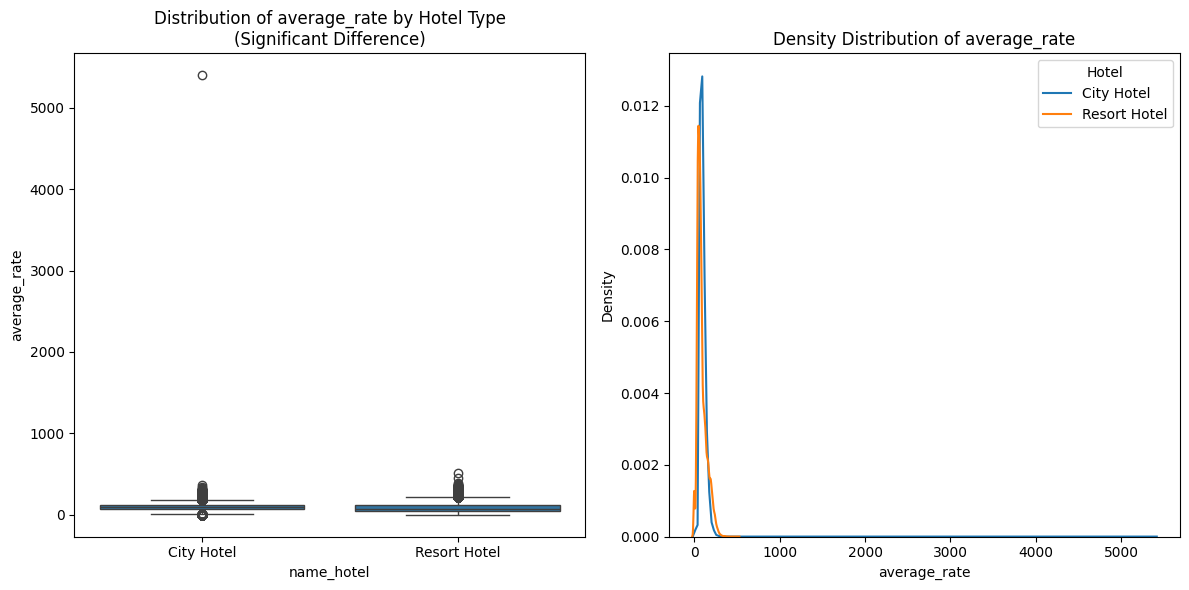


Plotting num_vehicles (Effect size: 0.415)


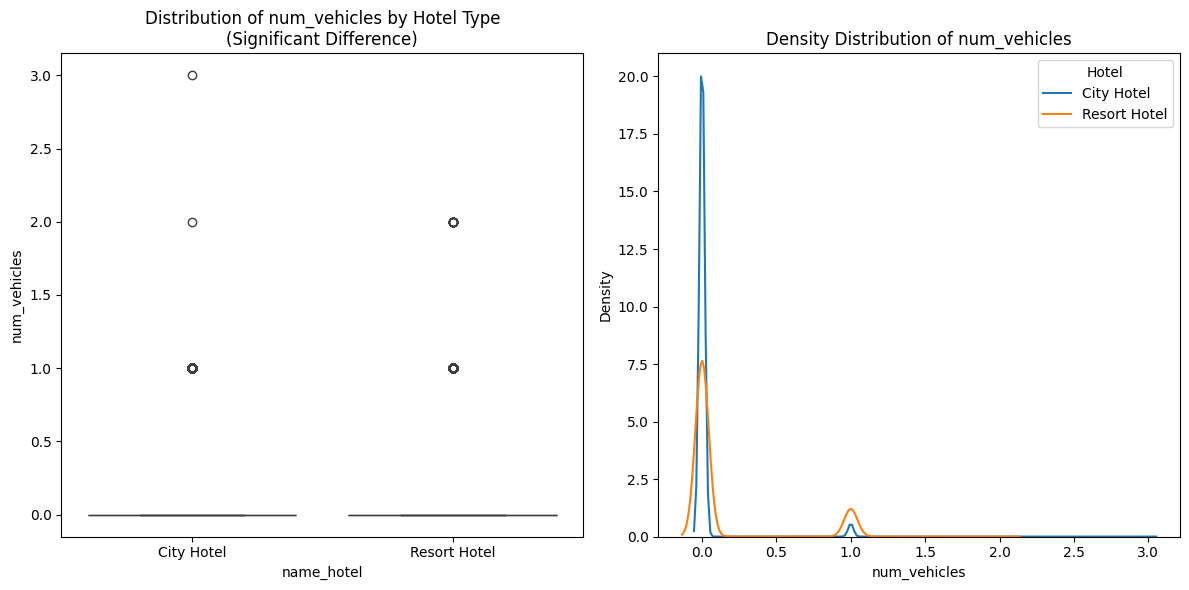


Plotting num_cancellations (Effect size: 0.030)


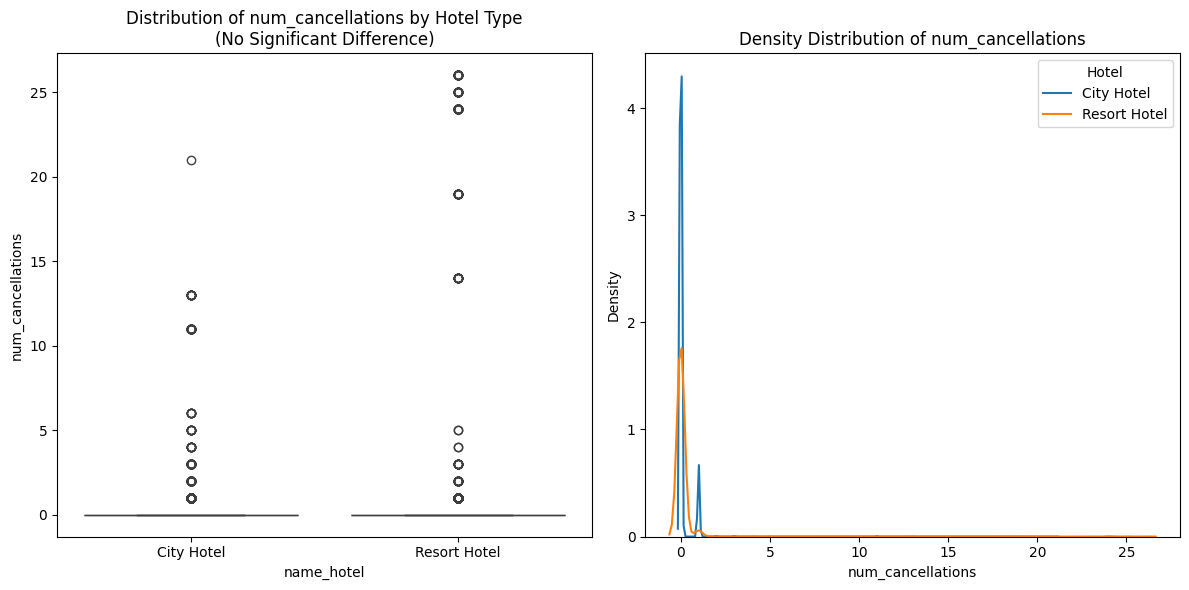


Plotting num_bookings_not_canceled (Effect size: 0.002)


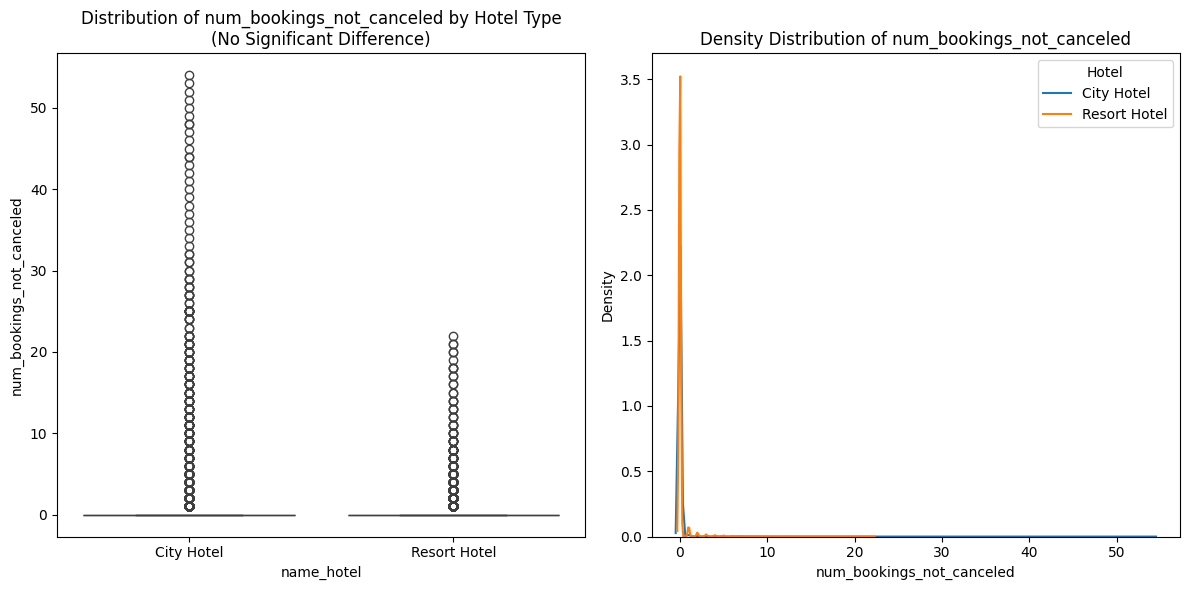


Plotting special_requests (Effect size: 0.110)


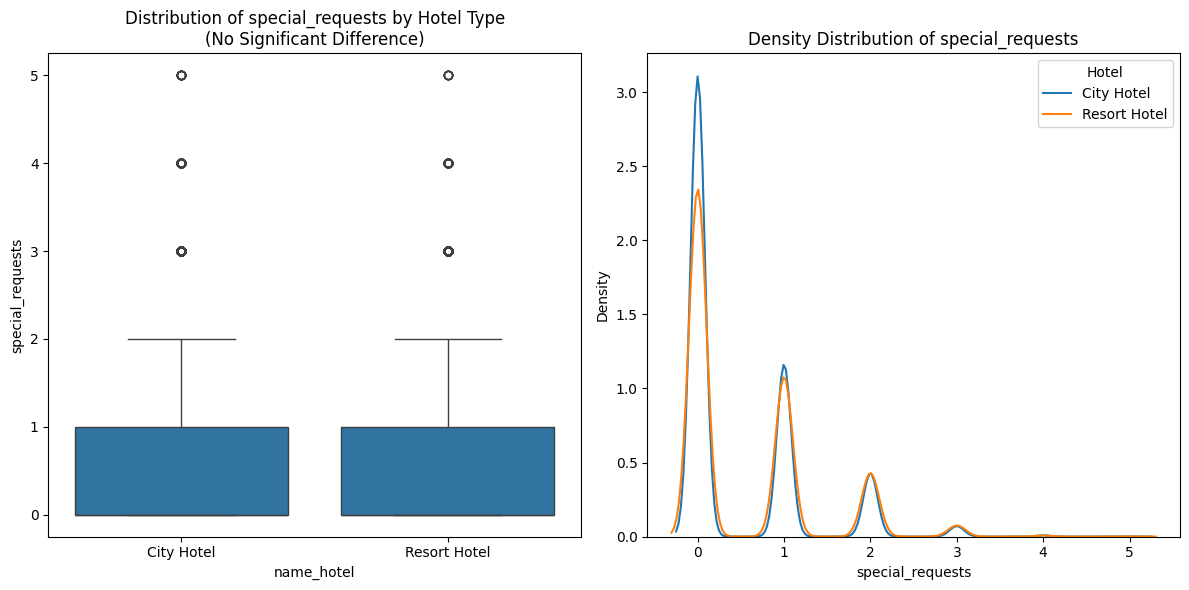


Plotting total_length_of_stay (Effect size: 0.496)


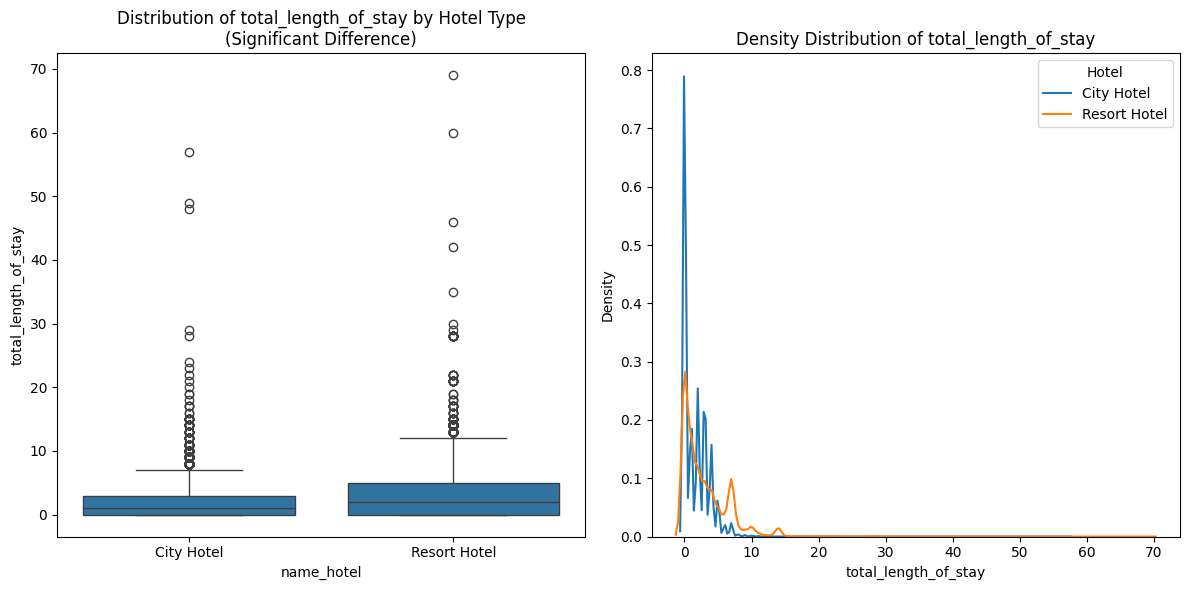


Plotting total_spending (Effect size: 0.488)


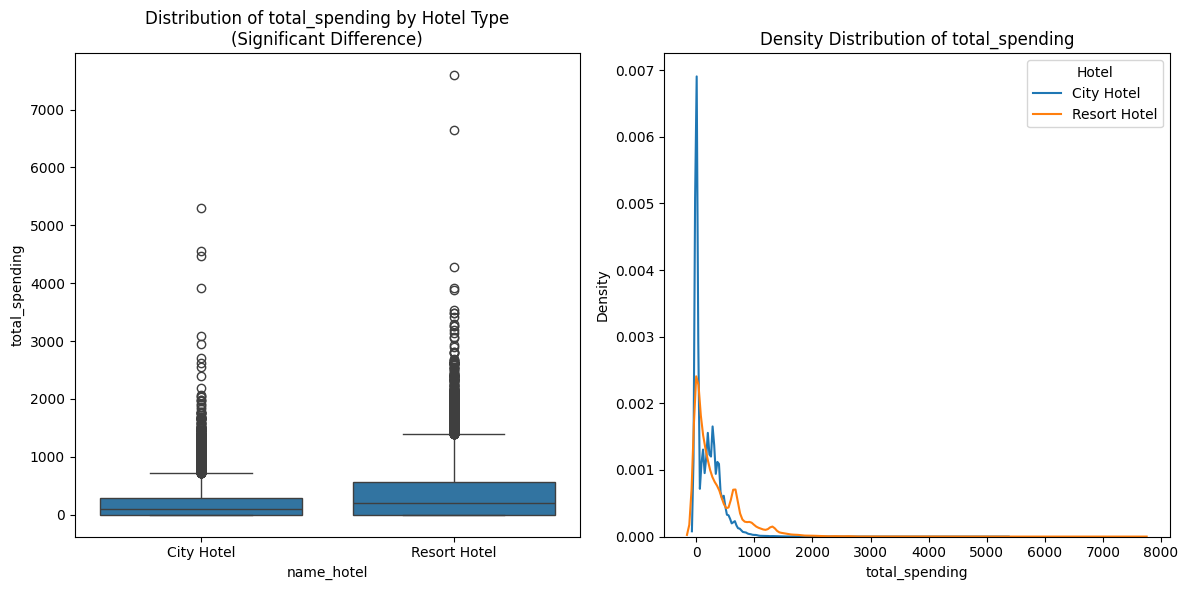


=== Categorical Variables ===

Plotting month (Cramer's V: 0.068)


<Figure size 1200x600 with 0 Axes>

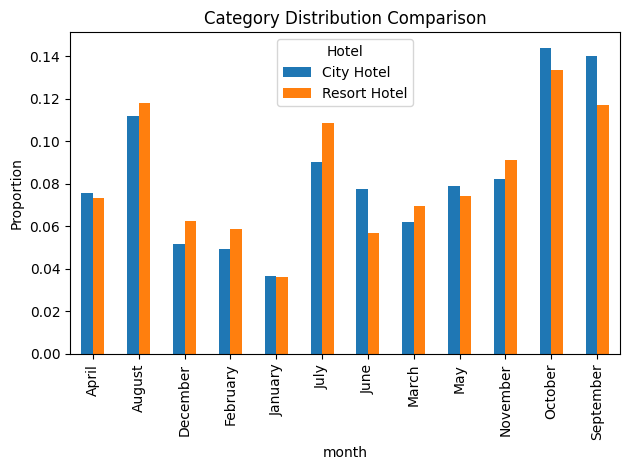


Plotting status (Cramer's V: 0.152)


<Figure size 1200x600 with 0 Axes>

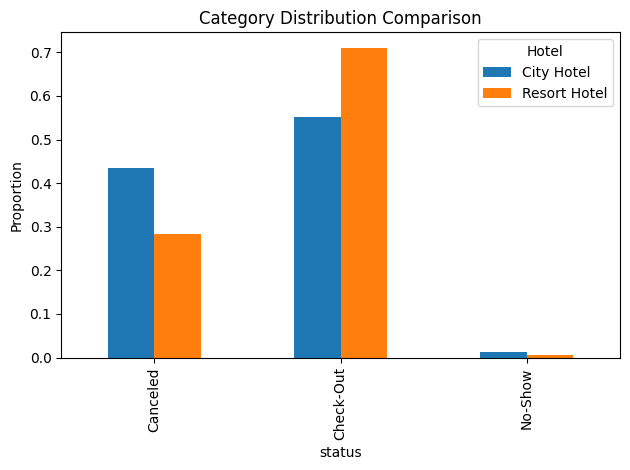


Plotting status_date (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

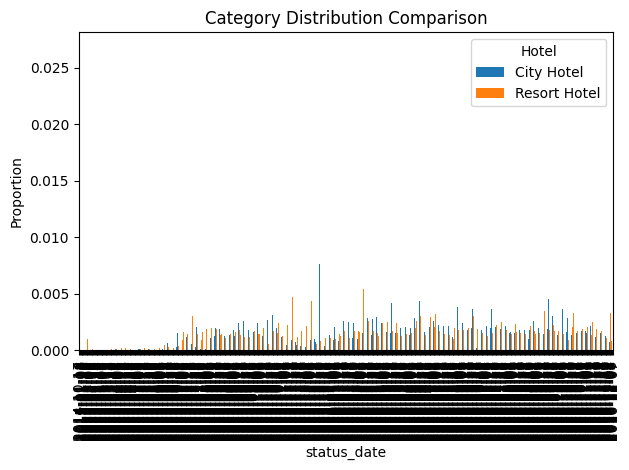


Plotting room_type (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

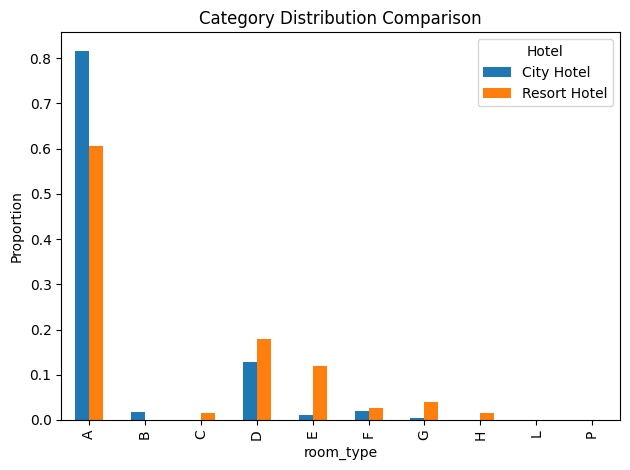


Plotting meal (Cramer's V: 0.289)


<Figure size 1200x600 with 0 Axes>

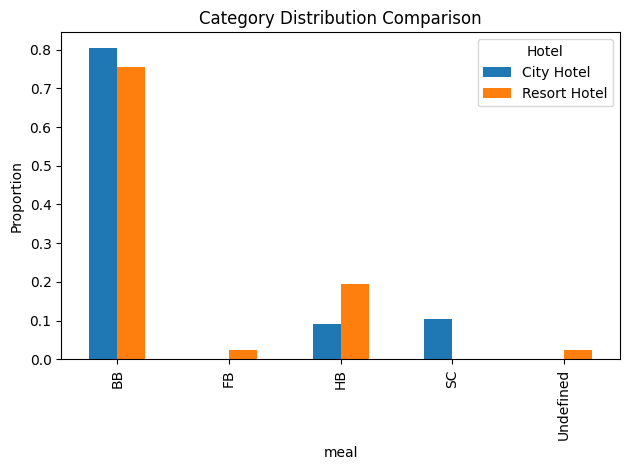


Plotting CRM (Cramer's V: 0.151)


<Figure size 1200x600 with 0 Axes>

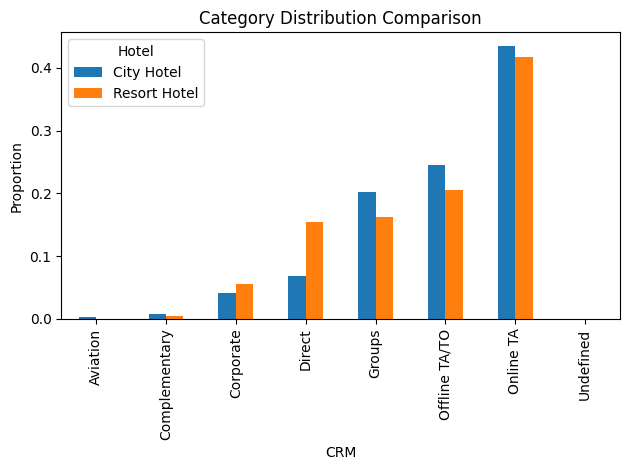


Plotting room_assigned (Cramer's V: 0.401)


<Figure size 1200x600 with 0 Axes>

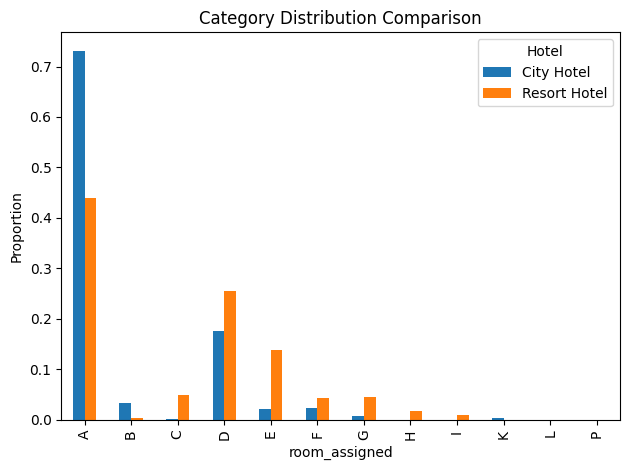


Plotting deposit (Cramer's V: 0.193)


<Figure size 1200x600 with 0 Axes>

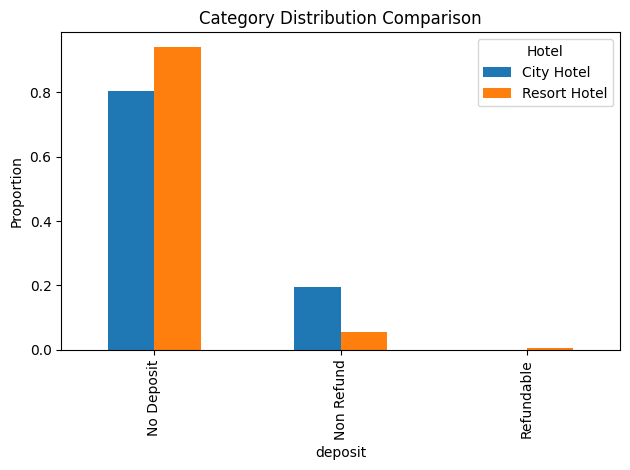


Plotting segment (Cramer's V: 0.070)


<Figure size 1200x600 with 0 Axes>

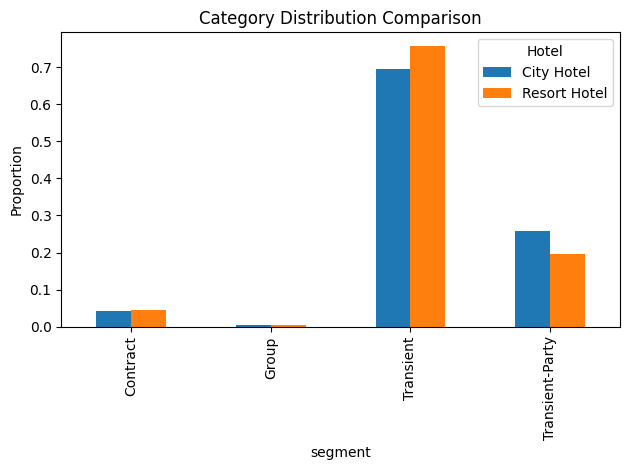

In [17]:
plot_distributions(reservations, results, show_all=True)

In [18]:
def prepare_target_var(df):
    df = df.copy()
    df['target_binary'] = df['status'].map(
        {'Canceled': 1, 'Check-Out': 0, 'No-Show':0}
    )
    
    return df

def target_relationships(df):
    '''
    analyze relationships between features and target variables, to see which seem to create the most separability.
    this is a complement to the visualizations, not to rely only on info conveyed on visualizations, which we might miss.
    '''
    results = {
        'numerical_analysis': {},
        'categorical_analysis': {}
    }

    df = prepare_target_var(df)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_cols.remove('target_binary')

    for col in numerical_cols:
        # we use the r coefficient to measure relationship between feature and target variable. 
        # varies between -1 and 1, 0 implying no correlation. 
        #stats.pointbiserialr should yield the same results as stats.pearsonr, which we studied in stats class.
        correlation = stats.pointbiserialr(df[col], df['target_binary'])
        
        fulfilled = df[df['target_binary'] == 0][col]
        canceled = df[df['target_binary'] == 1][col]
        pooled_std = np.sqrt((fulfilled.var() + canceled.var()) / 2)
        effect_size = abs(fulfilled.mean() - canceled.mean()) / pooled_std
        results['numerical_analysis'][col] = {
            'correlation': correlation.correlation,
            'p_value': correlation.pvalue,
            'effect_size': effect_size,
            'significant': correlation.pvalue < 0.05,
            'meaningful': abs(correlation.correlation) > 0.1 # we
        }
    
    # analyze categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if 'status' in categorical_cols:
        categorical_cols.remove('status')
    
    for col in categorical_cols:
        # chi-square independence test
        contingency = pd.crosstab(df[col], df['target_binary'])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency)
        
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        results['categorical_analysis'][col] = {
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': strength,
            'significant': p_value < 0.05,
            'meaningful': strength > 0.1
        }
    
    return results


In [19]:
target_results = target_relationships(reservations)
target_results

{'numerical_analysis': {'year': {'correlation': np.float64(0.12171926871397269),
   'p_value': np.float64(1.1255711253710384e-259),
   'effect_size': np.float64(0.24491462700750186),
   'significant': np.True_,
   'meaningful': np.True_},
  'number': {'correlation': np.float64(-0.009007326545693722),
   'p_value': np.float64(0.011150816296840145),
   'effect_size': np.float64(0.018544392637852312),
   'significant': np.True_,
   'meaningful': np.False_},
  'day_of_month': {'correlation': np.float64(-0.006519371825539072),
   'p_value': np.float64(0.06622408805908185),
   'effect_size': np.float64(0.013398854786412057),
   'significant': np.False_,
   'meaningful': np.False_},
  'reservation_days_advance': {'correlation': np.float64(0.3735144858614213),
   'p_value': np.float64(0.0),
   'effect_size': np.float64(0.7938091480748273),
   'significant': np.True_,
   'meaningful': np.True_},
  'weekend_nights': {'correlation': np.float64(-0.015623119079669588),
   'p_value': np.float64(1.07

In [20]:
def plot_target_relationships(df, target_analysis):
    """
    plot relationships between features and target variable using multiple visualization techniques.
    """
    df = prepare_target_var(df)
    
    # Numerical variable plotting
    numerical_vars = list(target_analysis['numerical_analysis'].keys())
    n_num = len(numerical_vars)
    
    if n_num > 0:
        for var in numerical_vars:
            metrics = target_analysis['numerical_analysis'][var]
            
            # Create figure with 2 subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            fig.suptitle(f'{var} vs Target\nCorrelation: {metrics["correlation"]:.3f} | p-value: {metrics["p_value"]:.3e}')
            
            # Box plot
            sns.boxplot(x='target_binary', y=var, data=df, ax=ax1)
            ax1.set_xlabel('Canceled (1) vs Fulfilled (0)')
            ax1.set_title('Box Plot')
            
            # Density plot
            for target_val in [0, 1]:
                subset = df[df['target_binary'] == target_val][var]
                sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')
            ax2.set_title('Density Plot')
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
    
    # categorical variable plotting
    categorical_vars = list(target_analysis['categorical_analysis'].keys())
    
    for var in categorical_vars:
        metrics = target_analysis['categorical_analysis'][var]
        plt.figure(figsize=(12, 6))

        #normalized stacked bar plot
        props = pd.crosstab(df[var], df['target_binary'], normalize='index')
        props.plot(kind='bar', stacked=True)

        plt.title(f'{var} vs Target\nCramer\'s V: {metrics["cramer_v"]:.3f}\np-value: {metrics["p_value"]:.3e}')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(['Fulfilled (0)', 'Canceled (1)'])
        plt.tight_layout()
        plt.show()

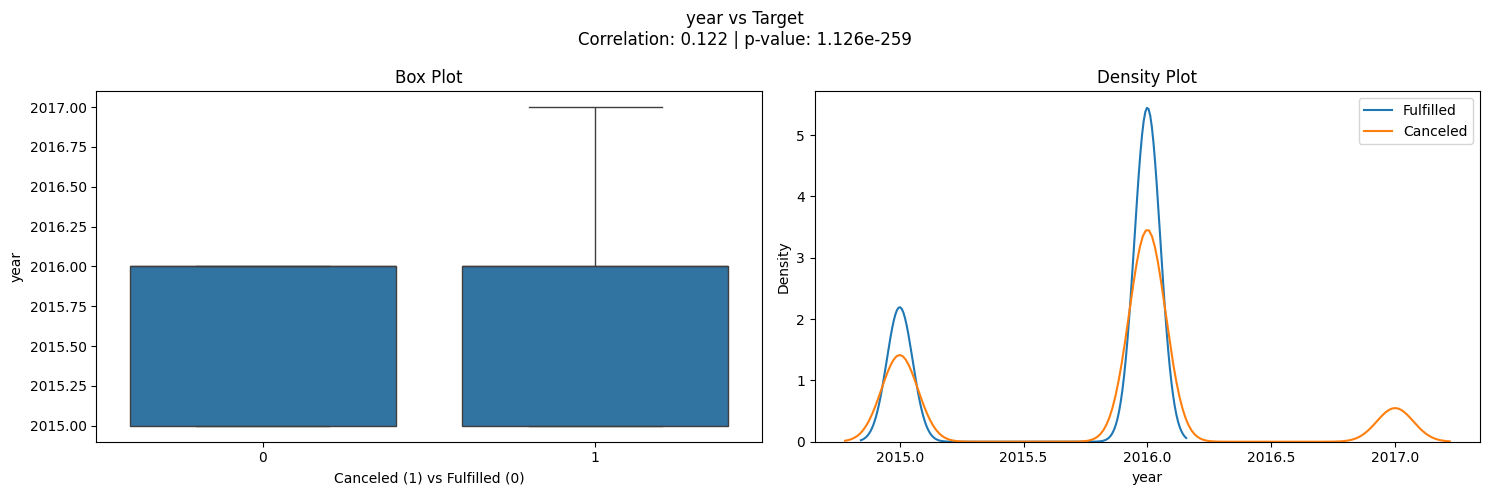

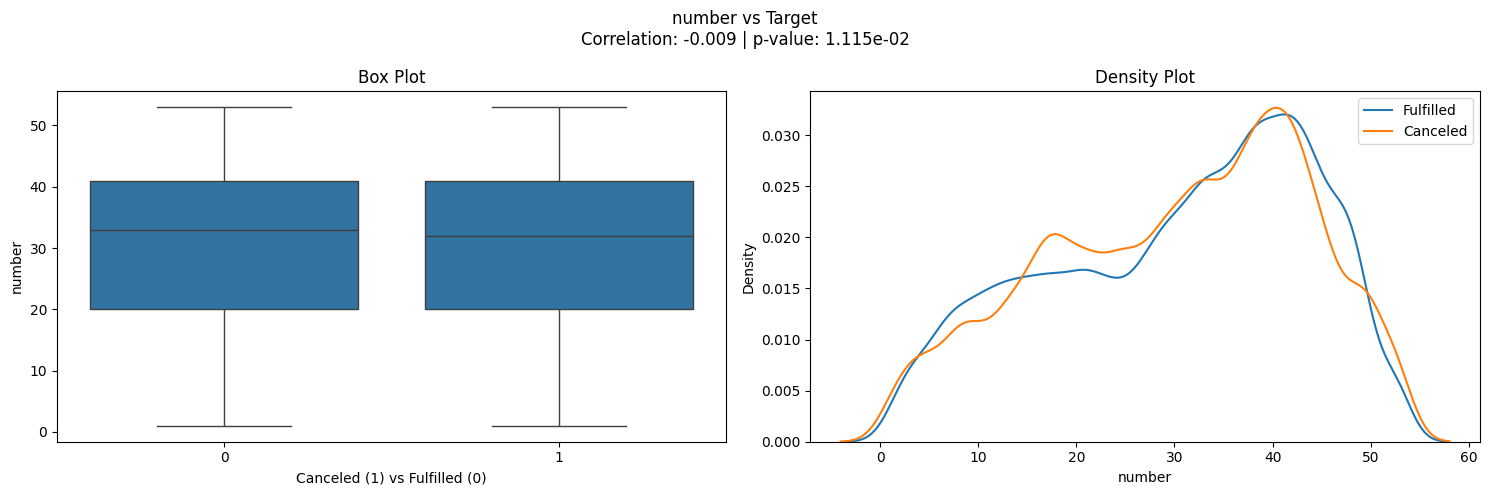

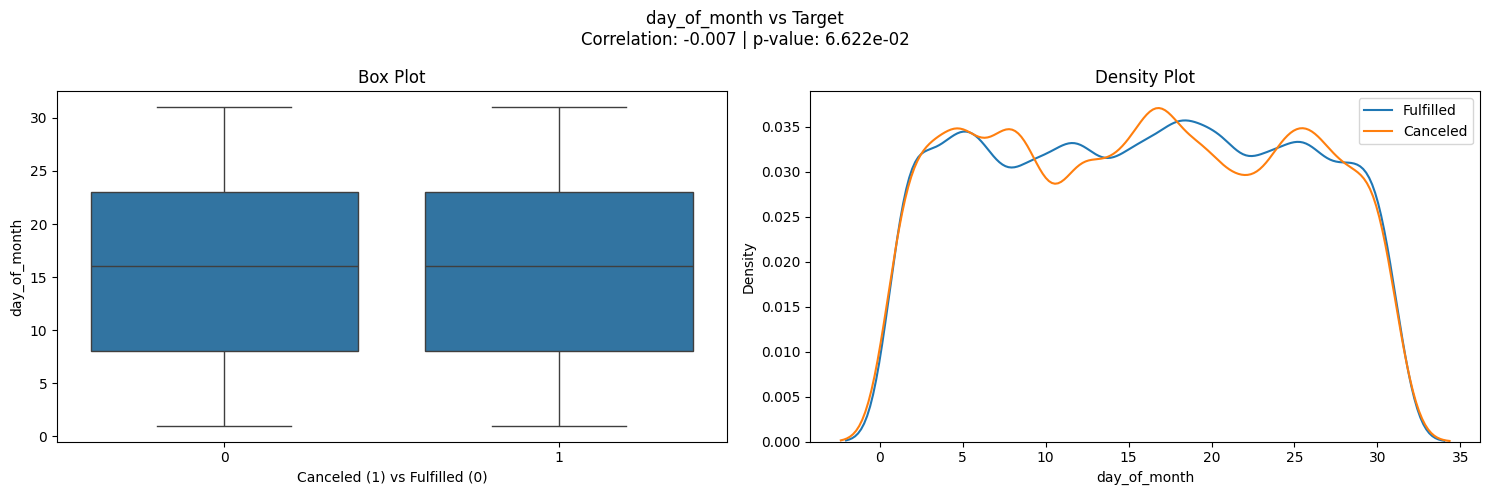

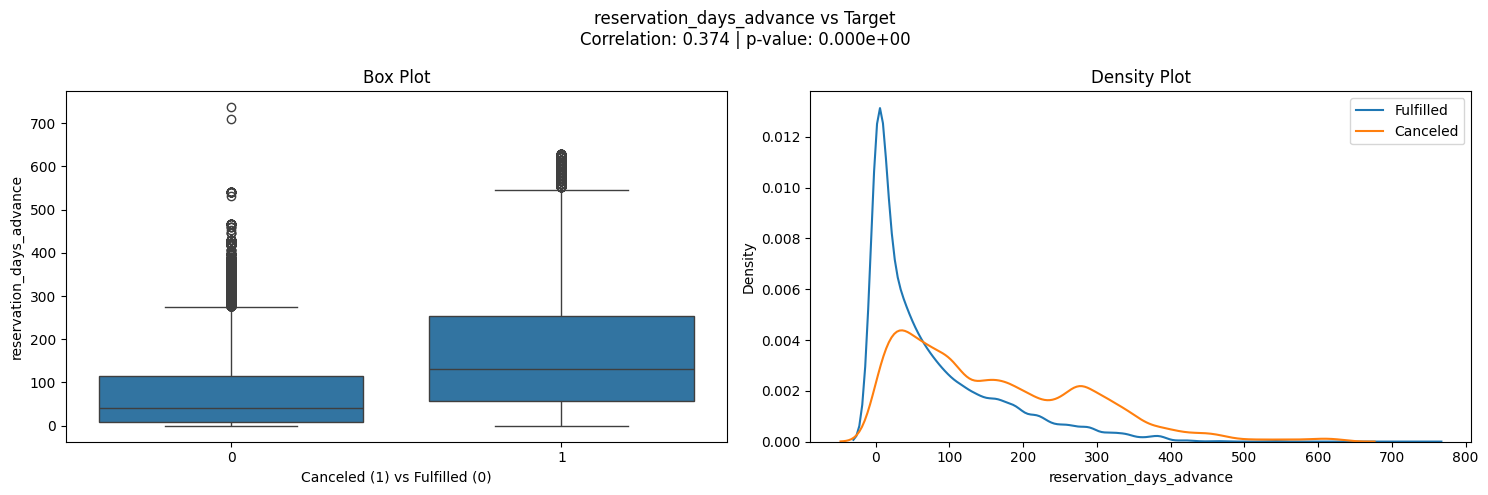

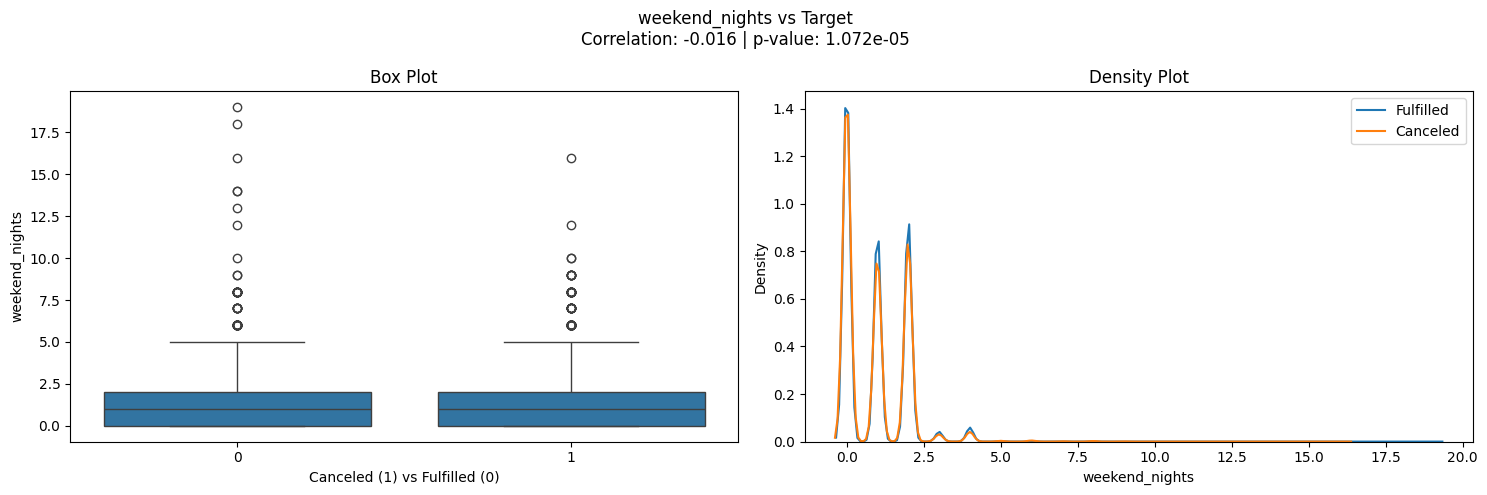

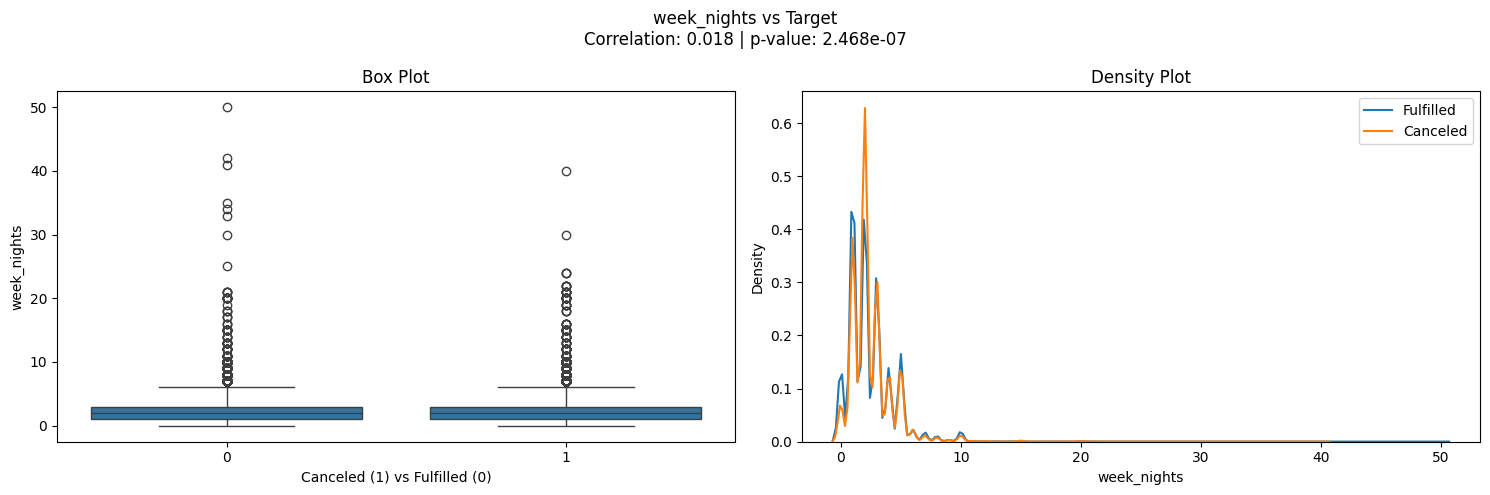

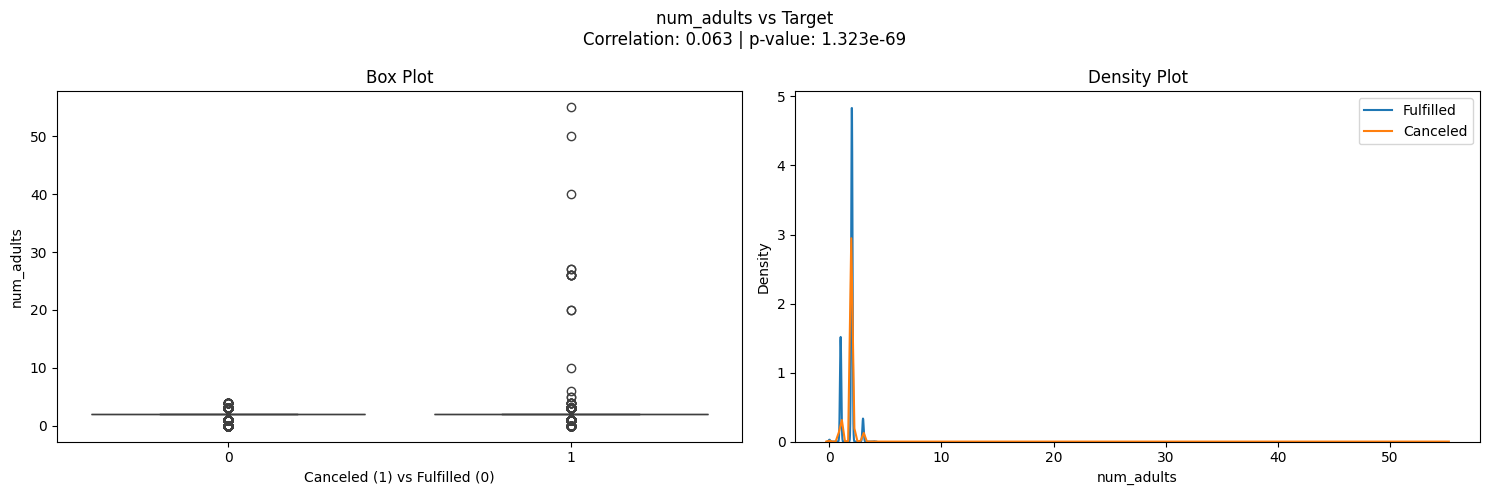

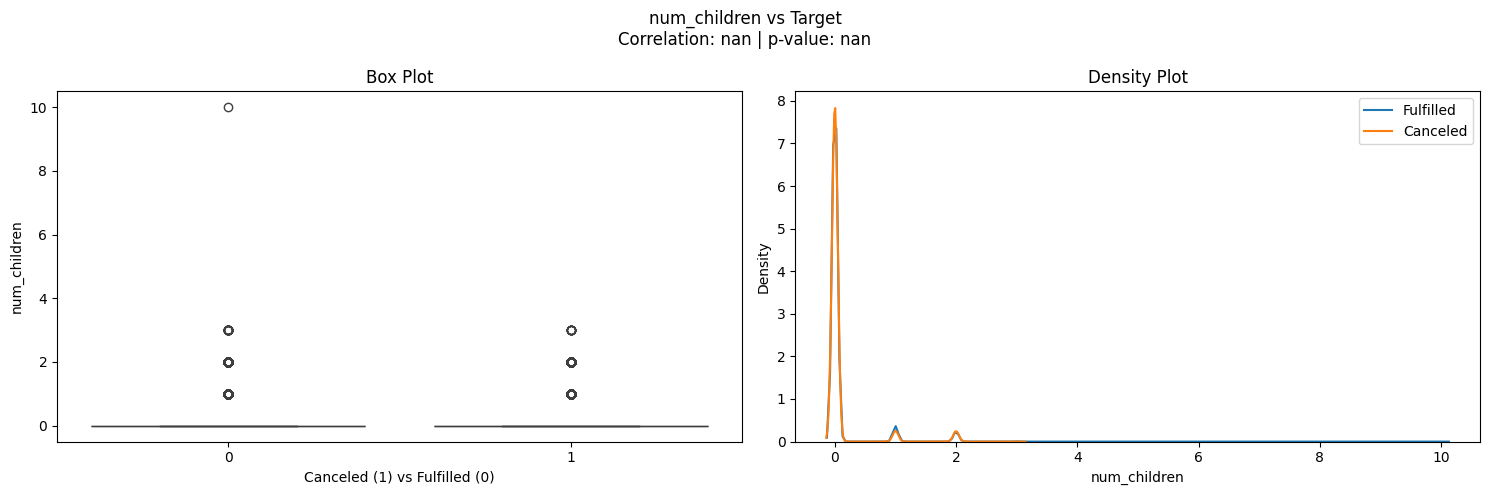

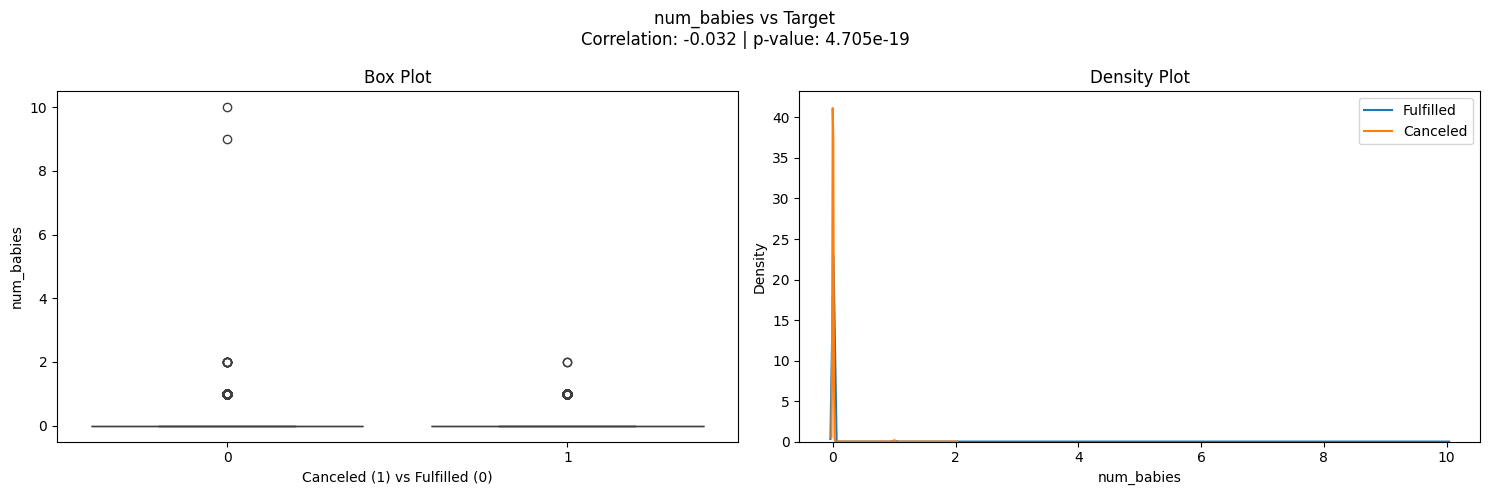

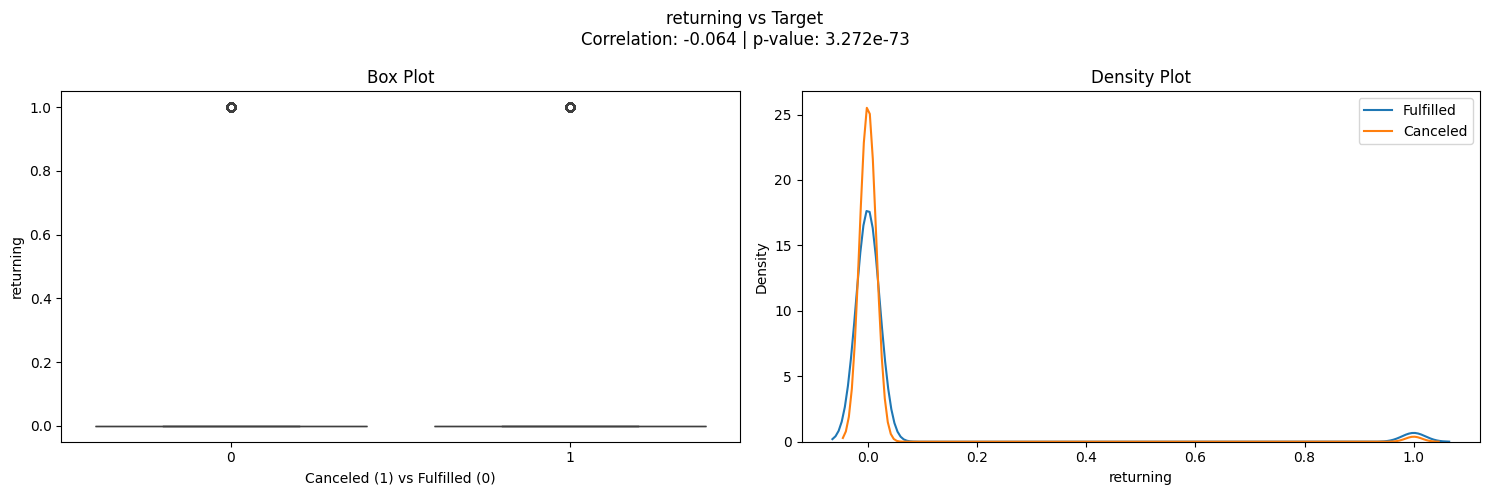

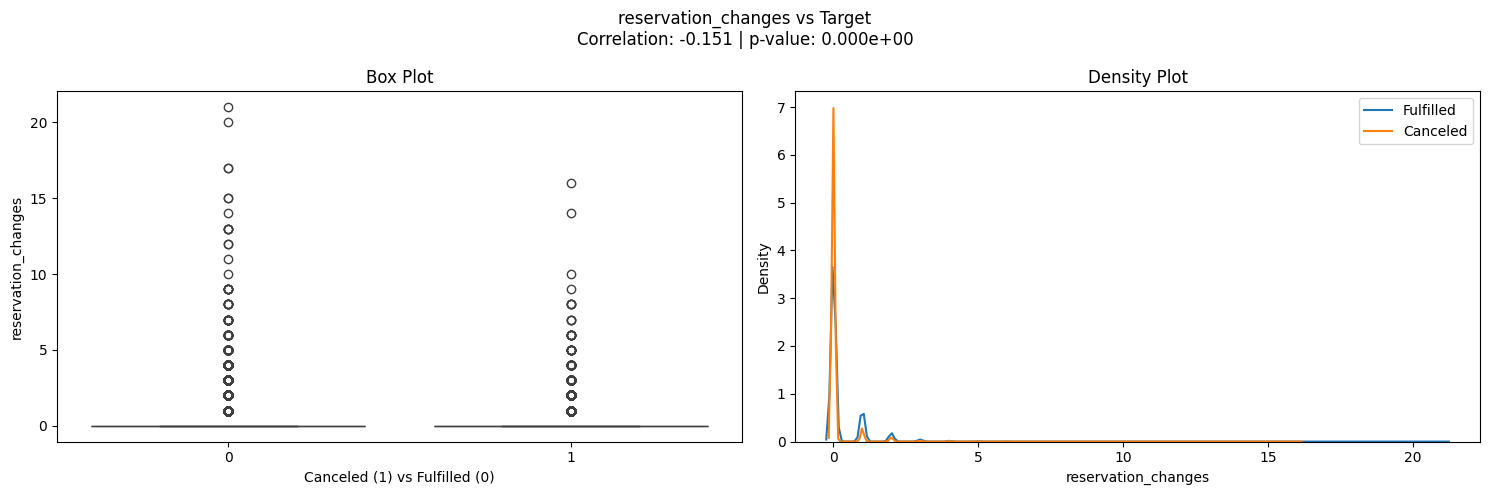

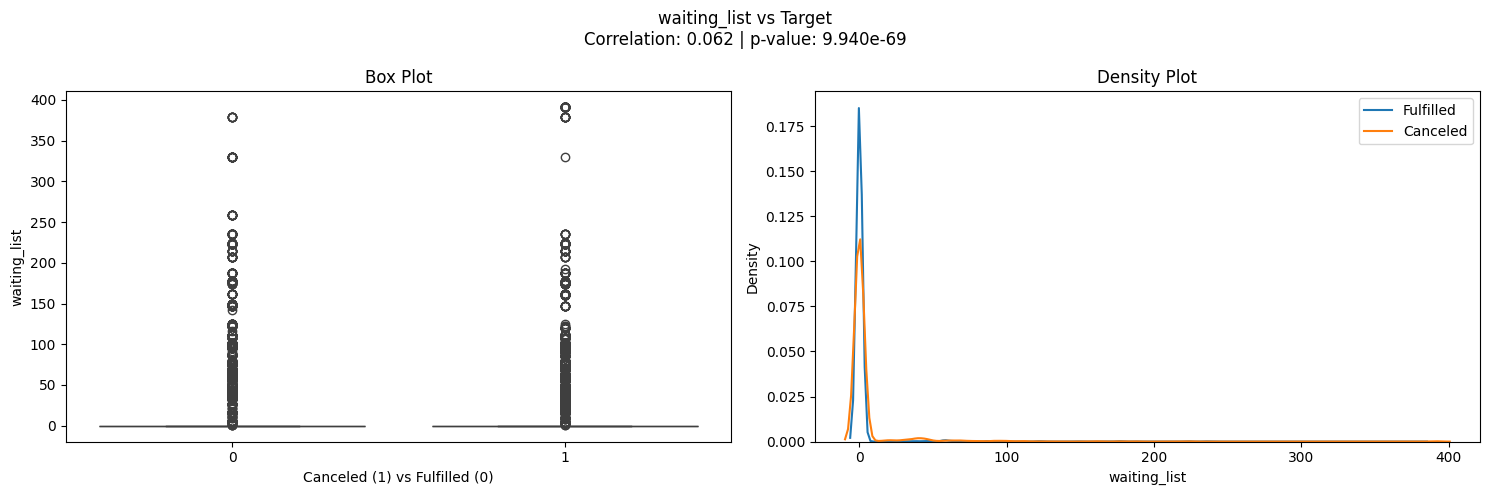

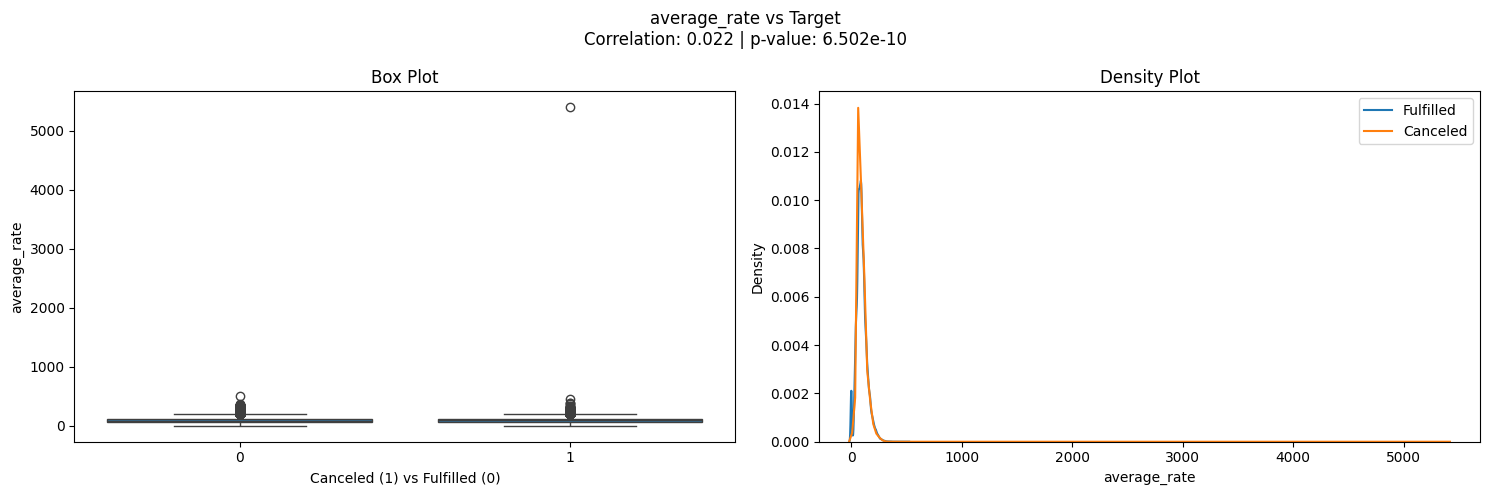

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4210/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


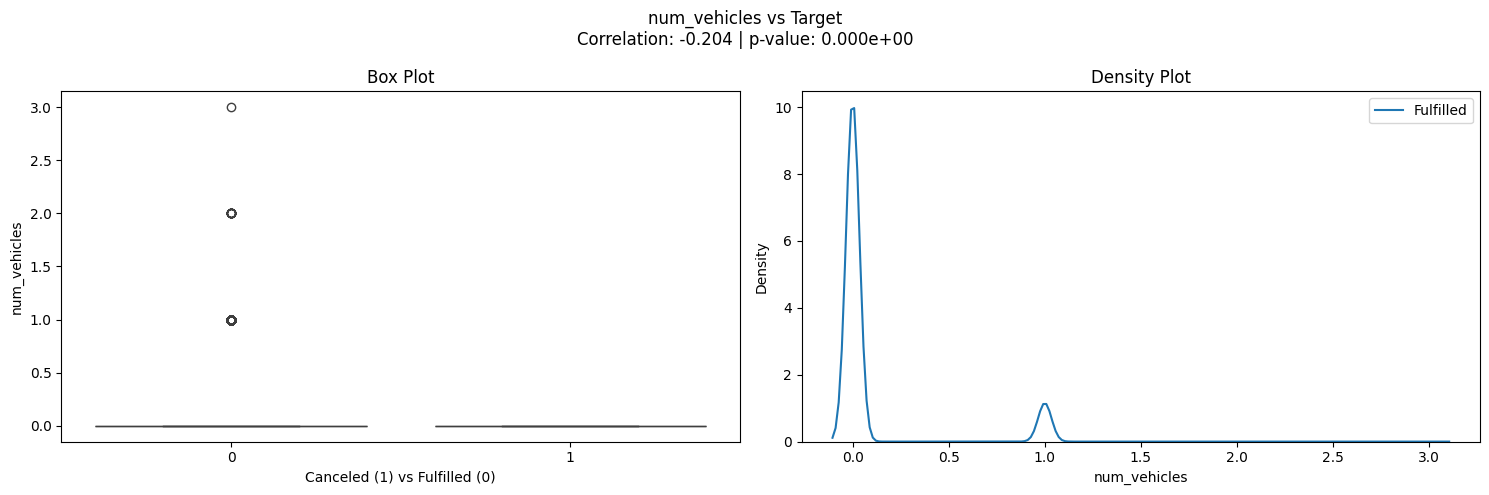

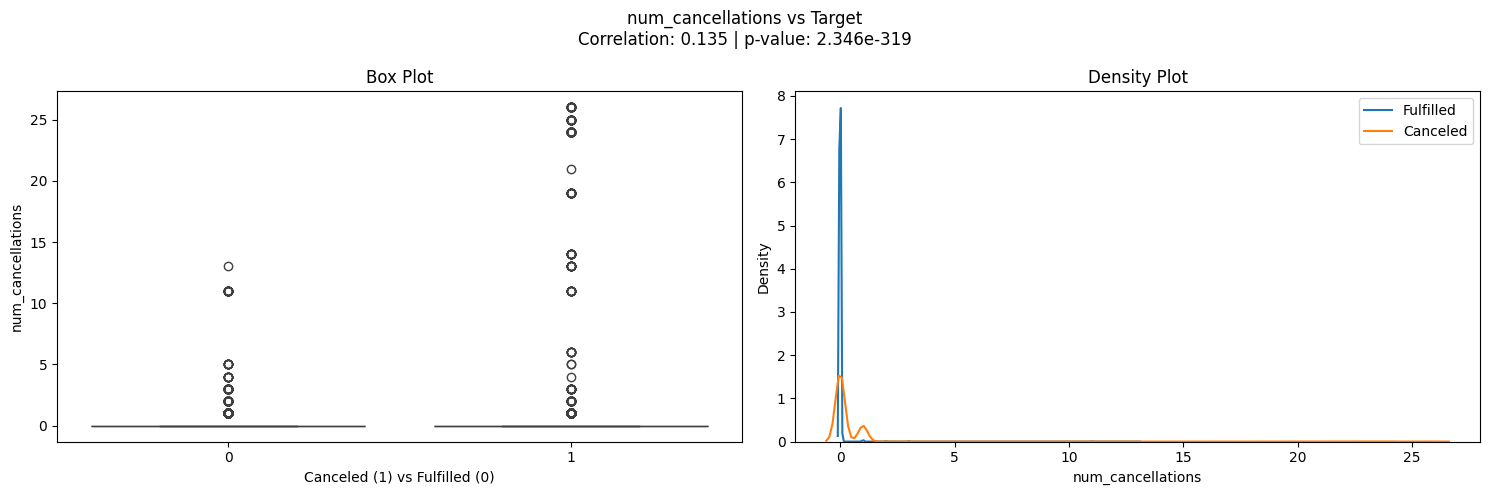

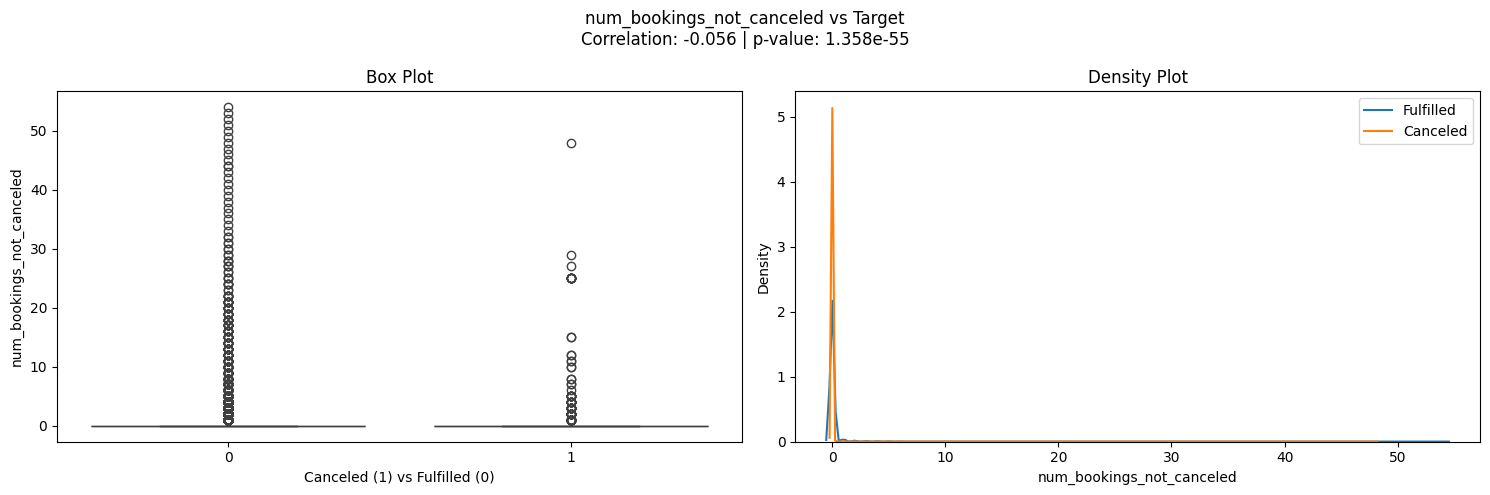

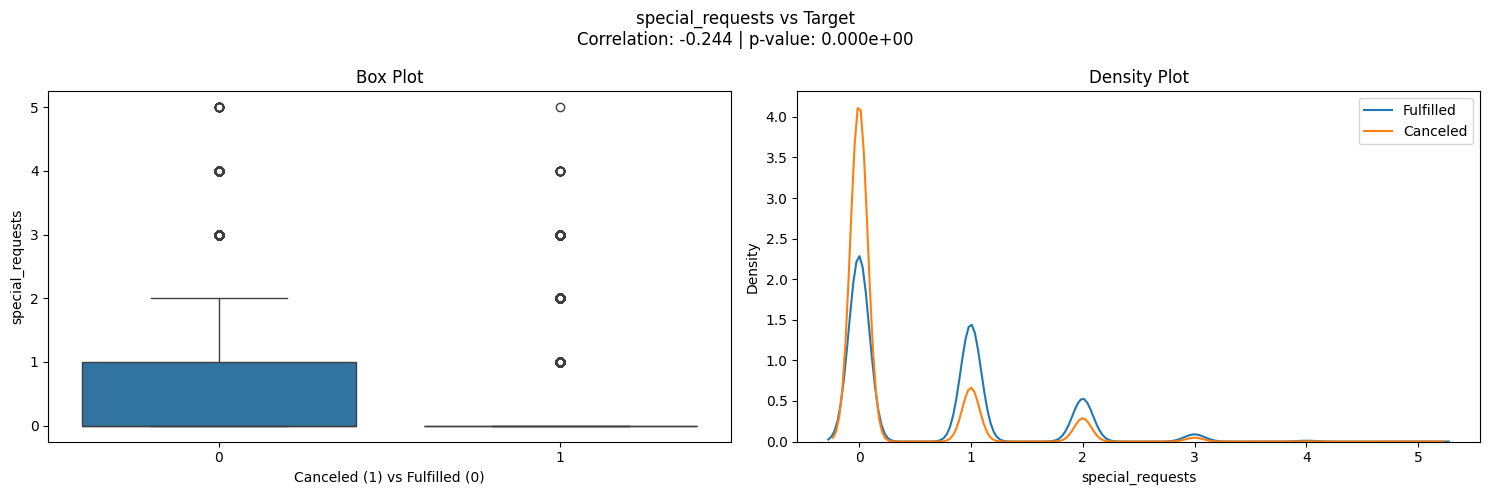

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4210/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


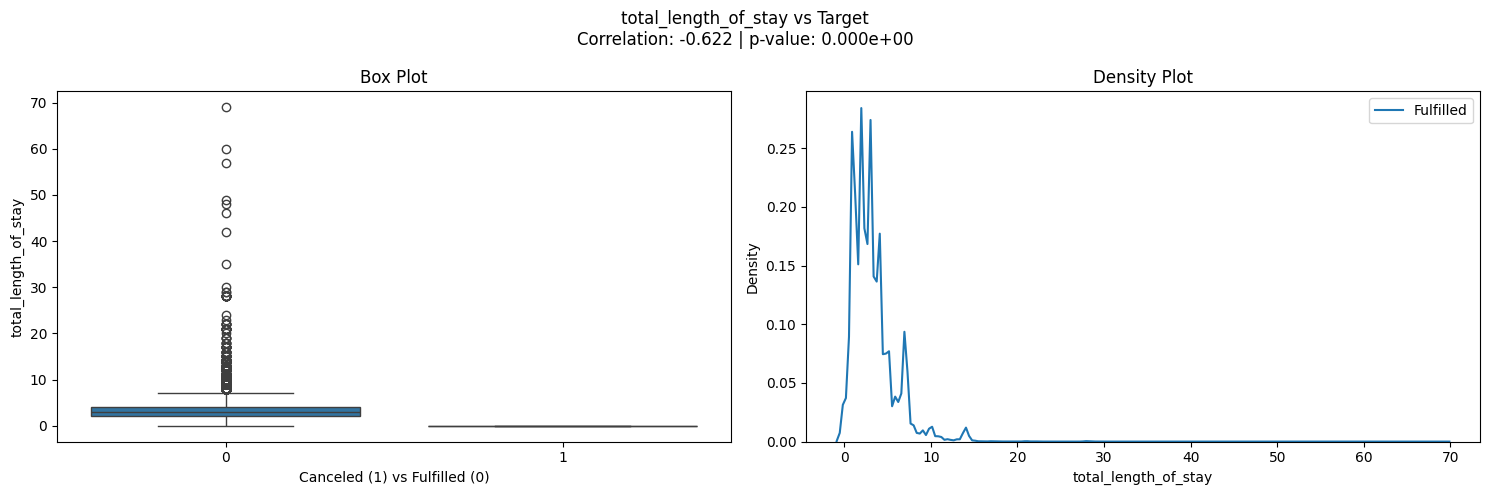

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4210/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


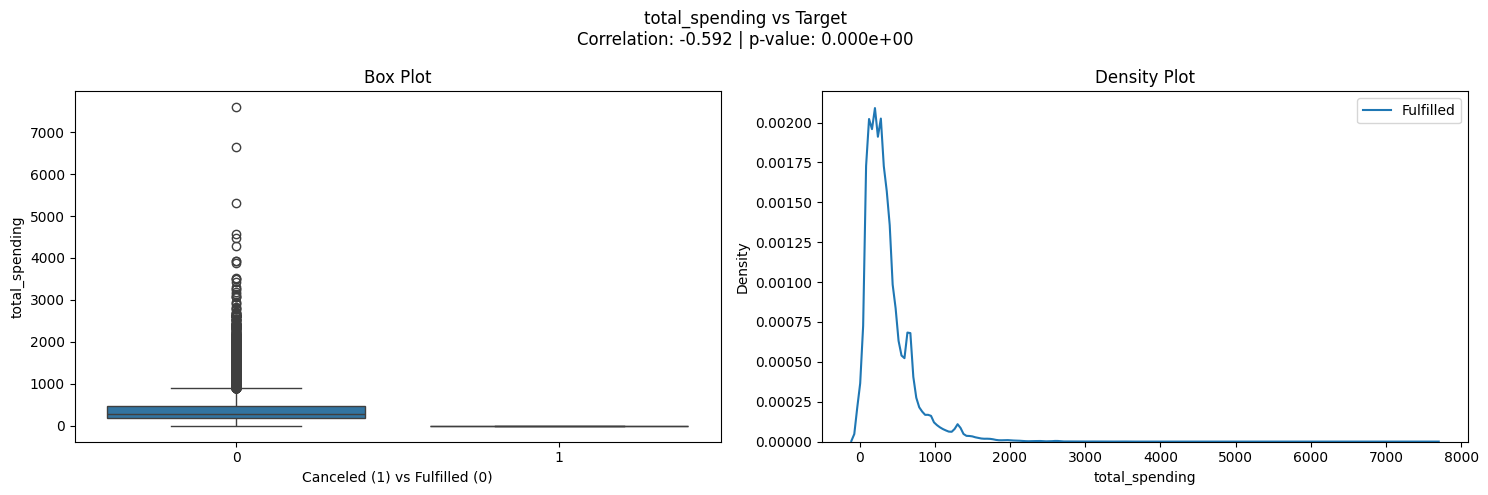

<Figure size 1200x600 with 0 Axes>

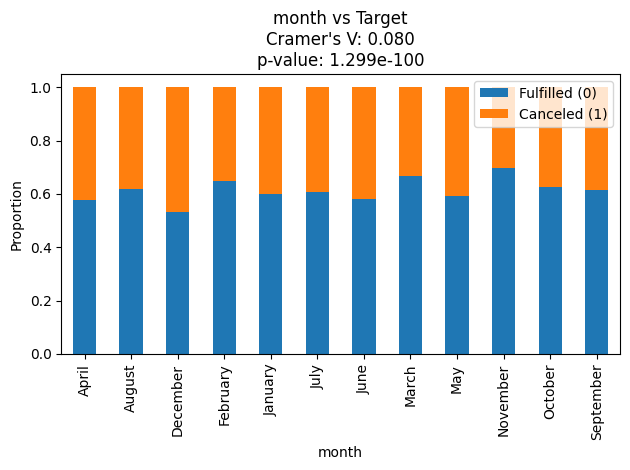

<Figure size 1200x600 with 0 Axes>

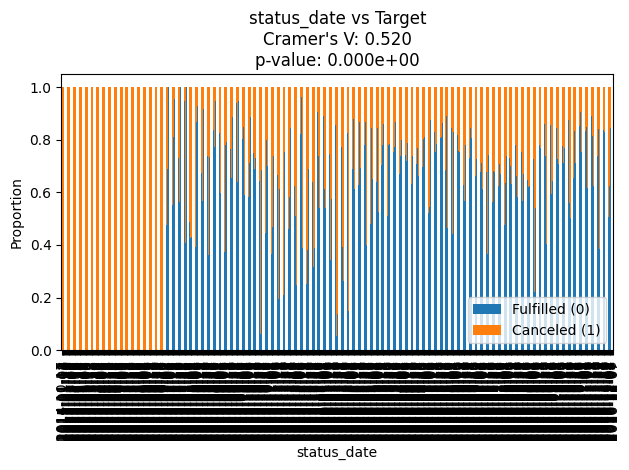

<Figure size 1200x600 with 0 Axes>

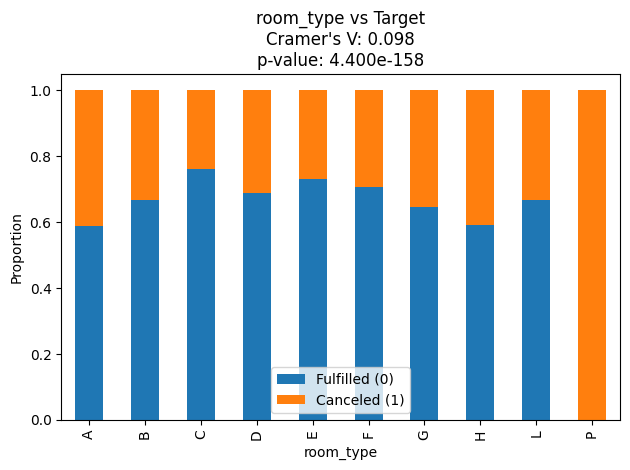

<Figure size 1200x600 with 0 Axes>

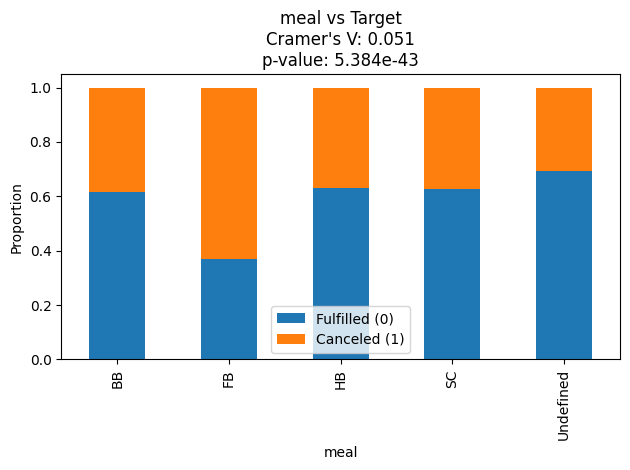

<Figure size 1200x600 with 0 Axes>

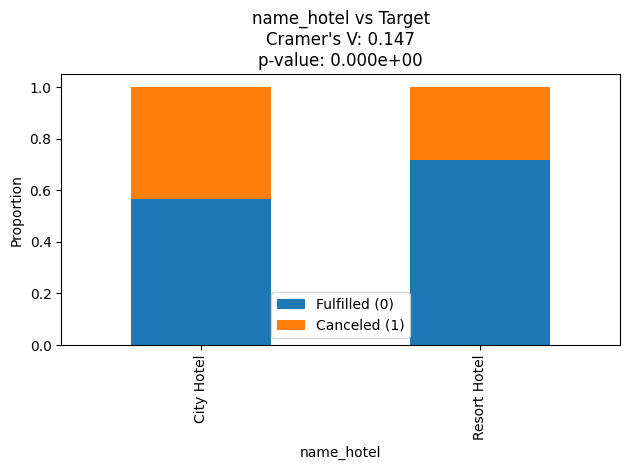

<Figure size 1200x600 with 0 Axes>

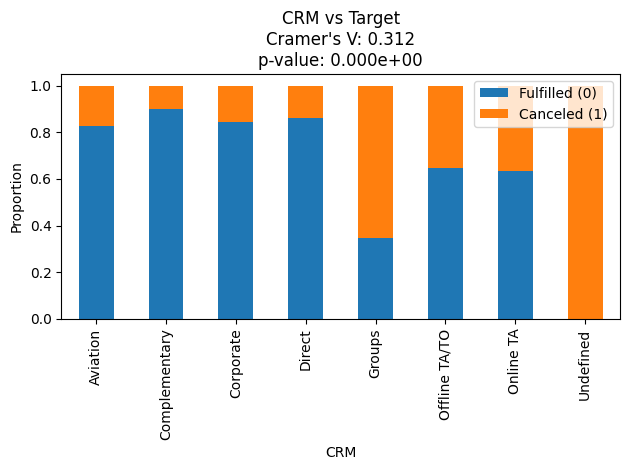

<Figure size 1200x600 with 0 Axes>

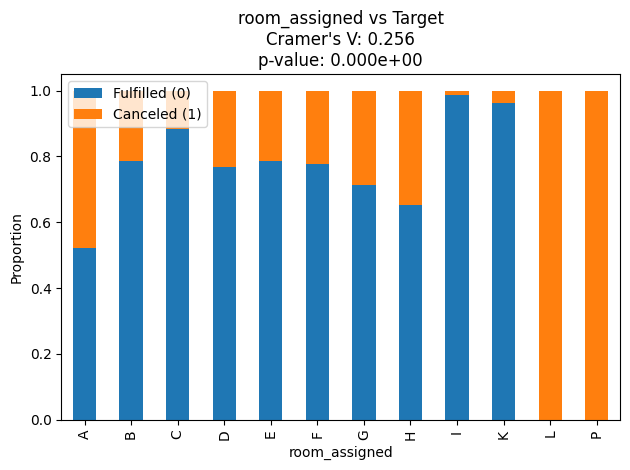

<Figure size 1200x600 with 0 Axes>

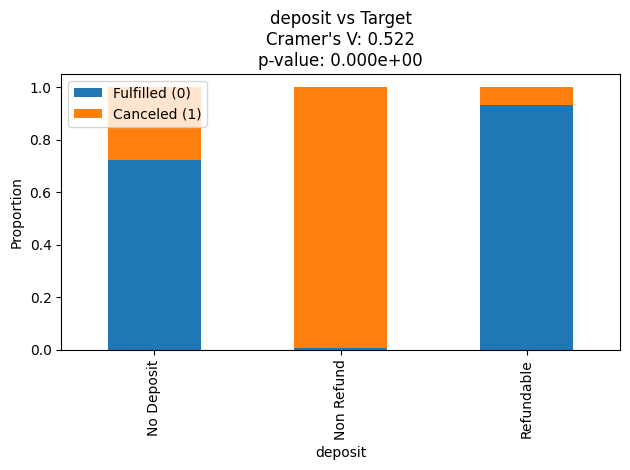

<Figure size 1200x600 with 0 Axes>

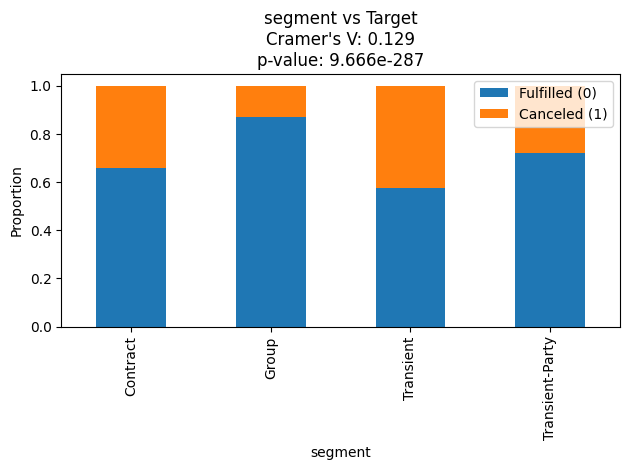

In [22]:
plot_target_relationships(reservations, target_results)

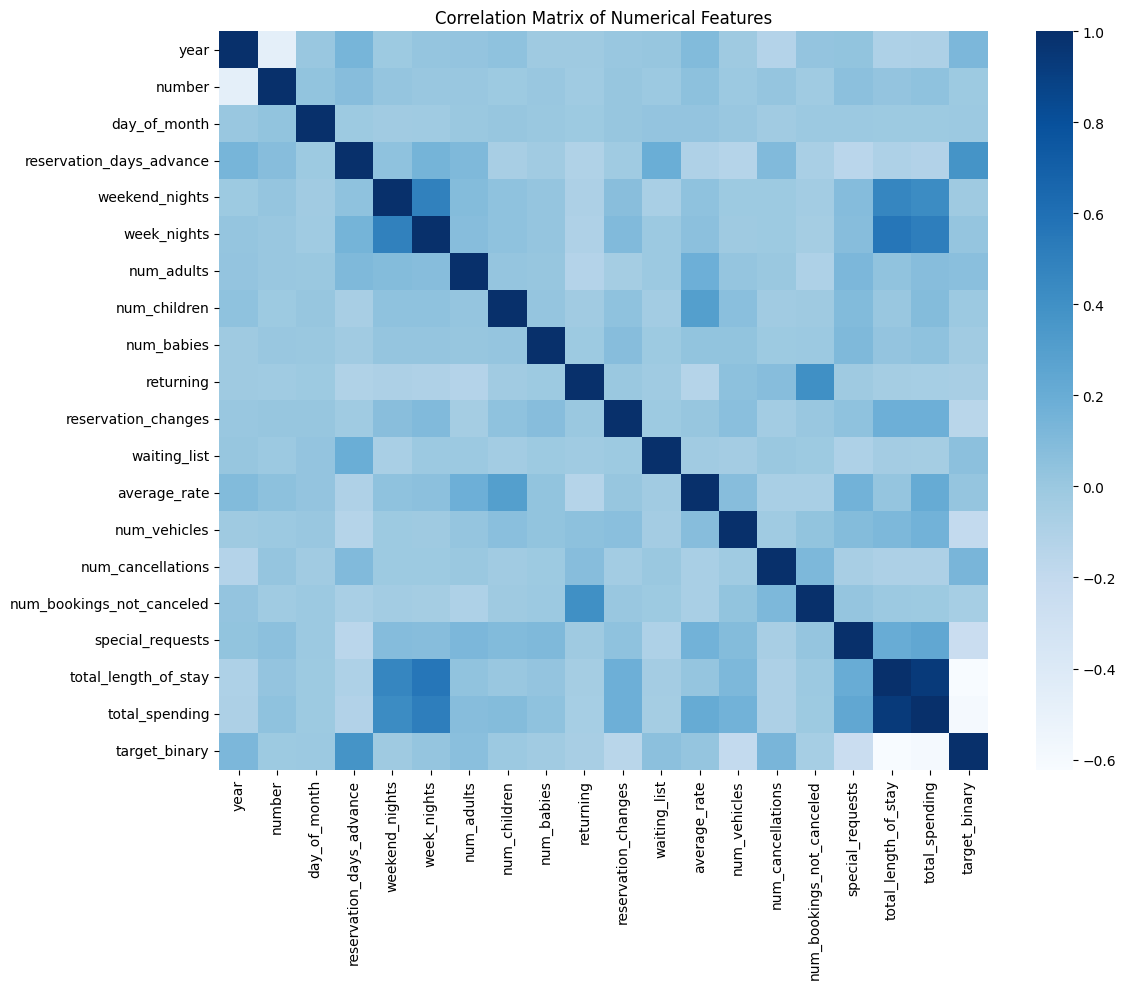


Feature Correlations with Target (Canceled vs. Not Canceled):
target_binary                1.000000
total_length_of_stay        -0.621926
total_spending              -0.591575
reservation_days_advance     0.373514
special_requests            -0.243556
num_vehicles                -0.203738
reservation_changes         -0.150568
num_cancellations            0.134973
year                         0.121719
returning                   -0.064168
num_adults                   0.062529
waiting_list                 0.062124
num_bookings_not_canceled   -0.055703
num_babies                  -0.031647
average_rate                 0.021923
week_nights                  0.018313
weekend_nights              -0.015623
number                      -0.009007
num_children                -0.007084
day_of_month                -0.006519
Name: target_binary, dtype: float64


In [21]:
def create_correlation_matrix(df):
    '''
    correlation matrix, including target variable.
    '''
    df = prepare_target_var(df)
    
    # including target
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='Blues')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # obtain the strongest correlations with target
    target_corr = corr_matrix['target_binary'].sort_values(key=abs, ascending=False)
    print("\nFeature Correlations with Target (Canceled vs. Not Canceled):")
    print(target_corr)
    
    return corr_matrix

corr_matrix = create_correlation_matrix(reservations)